# 1.保留条件

单独每个数据库进行筛选
1.人类
2.有CDR3B和epitope和MHC1三列 



合并多个数据集后进行筛选
4.是C开头，F结尾
5.不含有特殊字符串和大小写以及常见20种氨基酸
6.选择合适的CDR3和表位的长度

In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.McPAS 

In [6]:
McPAS = pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/McPAS_TCR/McPAS-TCR.csv",encoding='latin1')
McPAS['ID']= range(len(McPAS))
McPAS = McPAS[(McPAS['Species'] == 'Human')]
McPAS = McPAS[['CDR3.beta.aa','Pathology', 'Epitope.peptide','MHC','TRBV','TRBJ','ID']]
McPAS = McPAS.dropna(subset=['CDR3.beta.aa', 'Epitope.peptide','MHC'])
McPAS['database']='McPAS'
MHC=['HLA-A','HLA-B','HLA-C']
McPAS_cdr3 = McPAS[McPAS['MHC'].str.contains('|'.join(MHC))]
pd.unique(McPAS_cdr3.MHC)
column_mapping = {
    "CDR3.beta.aa": "CDR3B",
    "Pathology": "antigen_species",
    "Epitope.peptide": "Epitope",
    "MHC": "MHC",
    "TRBV":"TRBV",
    "TRBJ": "TRBJ",
    "ID":"ID",
    'database':'database'}

McPAS_df=McPAS_cdr3.rename(columns=column_mapping)
McPAS_df

array(['HLA-A*02', 'HLA-A2', 'HLA-Cw* 16:01', 'HLA-A*011', 'HLA-A*2:01',
       'HLA-B*8', 'HLA-A*02:01', 'HLA-B*44:05', 'HLA-B*57:01',
       'HLA-B*57:03', 'HLA-B*07:02', 'HLA-A*01:01', 'HLA-B*08:01',
       'HLA-B*57', 'HLA-B*08', 'HLA-B*15', 'HLA-B*27', 'HLA-B*27:05',
       'HLA-B*42', 'HLA-B*35:01', 'HLA-A*24:02', 'HLA-A*11:01',
       'HLA-B*35:02', 'HLA-A*01', 'HLA-B*42:01', 'HLA-A1', 'HLA-B7',
       'HLA-A*02:02', 'HLA-A*02:03', 'HLA-A*02:04', 'HLA-A*02:05',
       'HLA-A*02:06', 'HLA-A*02:07', 'HLA-A*02:08', 'HLA-A*02:09',
       'HLA-A*02:10', 'HLA-A*02:11', 'HLA-A*02:12', 'HLA-A*02:13',
       'HLA-A*02:14', 'HLA-A*02:15', 'HLA-A*02:16', 'HLA-A*02:17',
       'HLA-C*07:02', 'HLA-A2:01'], dtype=object)

# 2.VDJdb

In [9]:
vdjdb = pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/VDJdb/vdjdb.txt", delimiter='\t', encoding='latin1')
vdjdb['ID']=range(len(vdjdb))
vdjdb

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp,ID
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no,0
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no,1
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no,2
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no,3
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no,92766
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no,92767
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no,92768
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no,92769


In [10]:
cdr3b = vdjdb[(vdjdb['gene'] == 'TRB') & (vdjdb['species'] == 'HomoSapiens') & (vdjdb['mhc.class'] == 'MHCI')]
#cdr3b = cdr3b[cdr3b['vdjdb.score'] != 0]
cdr3b['database']='vdjdb'


/tmp/ipykernel_46509/2369093895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdr3b['database']='vdjdb'


In [11]:
cdr3b = cdr3b[['cdr3', 'antigen.epitope', 'antigen.species','v.segm','j.segm','mhc.a','ID','database','vdjdb.score']]
cdr3b


,cdr3,antigen.epitope,antigen.species,v.segm,j.segm,mhc.a,ID,database,vdjdb.score
1,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,HIV-1,TRBV13*01,TRBJ1-5*01,HLA-B*08,1,vdjdb,2
2,CASSFEAGQGFFSNQPQHF,FLKEKGGL,HIV-1,TRBV13*01,TRBJ1-5*01,HLA-B*08,2,vdjdb,2
4,CASSFEPGQGFYSNQPQHF,FLKEKGGL,HIV-1,TRBV13*01,TRBJ1-5*01,HLA-B*08,4,vdjdb,2
6,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,HIV-1,TRBV13*01,TRBJ1-5*01,HLA-B*08,6,vdjdb,2
8,CASSALASLNEQFF,FLKEKGGL,HIV-1,TRBV14*01,TRBJ2-1*01,HLA-B*08,8,vdjdb,2
...,...,...,...,...,...,...,...,...,...
92400,CASSQDRLVNADTQYF,RPGGKKHYM,HIV,TRBV4-2*01,TRBJ2-3*01,HLA-B*42:01,92400,vdjdb,1
92401,CASSLAGDRGNYGYTF,RPGGKKHYM,HIV,TRBV27*01,TRBJ1-2*01,HLA-B*42:01,92401,vdjdb,1
92402,CASRRQGALNTEAFF,RPGGKKHYM,HIV,TRBV27*01,TRBJ1-1*01,HLA-B*42:01,92402,vdjdb,1
92403,CASSQDRVVGADTQYF,RPGGKKHYM,HIV,TRBV4-2*01,TRBJ2-3*01,HLA-B*42:01,92403,vdjdb,0


In [12]:
column_mapping = {
    "cdr3": "CDR3B",
    "antigen.species": "antigen_species",
    "antigen.epitope": "Epitope",
    "mhc.a": "MHC",
    "v.segm":"TRBV",
    "j.segm": "TRBJ",
    "ID":"ID",
    'database':'database',
     'vdjdb.score':'vdjdb_score'}

vdjdb_df=cdr3b.rename(columns=column_mapping)
vdjdb_df

,CDR3B,Epitope,antigen_species,TRBV,TRBJ,MHC,ID,database,vdjdb_score
1,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,HIV-1,TRBV13*01,TRBJ1-5*01,HLA-B*08,1,vdjdb,2
2,CASSFEAGQGFFSNQPQHF,FLKEKGGL,HIV-1,TRBV13*01,TRBJ1-5*01,HLA-B*08,2,vdjdb,2
4,CASSFEPGQGFYSNQPQHF,FLKEKGGL,HIV-1,TRBV13*01,TRBJ1-5*01,HLA-B*08,4,vdjdb,2
6,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,HIV-1,TRBV13*01,TRBJ1-5*01,HLA-B*08,6,vdjdb,2
8,CASSALASLNEQFF,FLKEKGGL,HIV-1,TRBV14*01,TRBJ2-1*01,HLA-B*08,8,vdjdb,2
...,...,...,...,...,...,...,...,...,...
92400,CASSQDRLVNADTQYF,RPGGKKHYM,HIV,TRBV4-2*01,TRBJ2-3*01,HLA-B*42:01,92400,vdjdb,1
92401,CASSLAGDRGNYGYTF,RPGGKKHYM,HIV,TRBV27*01,TRBJ1-2*01,HLA-B*42:01,92401,vdjdb,1
92402,CASRRQGALNTEAFF,RPGGKKHYM,HIV,TRBV27*01,TRBJ1-1*01,HLA-B*42:01,92402,vdjdb,1
92403,CASSQDRVVGADTQYF,RPGGKKHYM,HIV,TRBV4-2*01,TRBJ2-3*01,HLA-B*42:01,92403,vdjdb,0


# 3.IEDB

In [13]:
IEDB = pd.read_excel("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/IEDB/receptor_MHCI_human.xlsx")
IEDB

,Group IRI,IEDB Receptor ID,Reference Name,Type,IEDB IRI,IEDB IRI.1,epitope,Source Molecule,Source Organism,Type.1,...,CDR1 Start Curated.1,CDR1 End Curated.1,CDR1 Start Calculated.1,CDR1 End Calculated.1,CDR2 Curated.1,CDR2 Calculated.1,CDR2 Start Curated.1,CDR2 End Curated.1,CDR2 Start Calculated.1,CDR2 End Calculated.1
0,http://www.iedb.org/receptor/8493,58,LC13,alphabeta,http://www.iedb.org/reference/1004580,http://www.iedb.org/epitope/144889,FLRGRFYGL,NaN,NaN,T cell,...,NaN,NaN,25.0,29.0,NaN,FQNEAQ,NaN,NaN,47.0,52.0
1,http://www.iedb.org/receptor/8493,58,LC13,alphabeta,http://www.iedb.org/reference/1004580,http://www.iedb.org/epitope/16878,FLRGRAYGL,nuclear antigen EBNA-3,Human herpesvirus 4 (Epstein Barr virus),T cell,...,NaN,NaN,25.0,29.0,NaN,FQNEAQ,NaN,NaN,47.0,52.0
2,http://www.iedb.org/receptor/8493,58,LC13,alphabeta,http://www.iedb.org/reference/1017865,http://www.iedb.org/epitope/156273,EEYLKAWTF,NaN,NaN,T cell,...,NaN,NaN,25.0,29.0,NaN,FQNEAQ,NaN,NaN,47.0,52.0
3,http://www.iedb.org/receptor/8493,58,LC13,alphabeta,http://www.iedb.org/reference/1017865,http://www.iedb.org/epitope/16878,FLRGRAYGL,nuclear antigen EBNA-3,Human herpesvirus 4 (Epstein Barr virus),T cell,...,NaN,NaN,25.0,29.0,NaN,FQNEAQ,NaN,NaN,47.0,52.0
4,http://www.iedb.org/receptor/8493,58,LC13,alphabeta,http://www.iedb.org/reference/1017865,http://www.iedb.org/epitope/156273,EEYLKAWTF,NaN,NaN,T cell,...,NaN,NaN,25.0,29.0,NaN,FQNEAQ,NaN,NaN,47.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203523,http://www.iedb.org/receptor/198814,219087,NaN,alphabeta,http://www.iedb.org/reference/1042548,http://www.iedb.org/epitope/37257,LLFGYPVYV,transcriptional activator Tax,Human T-cell leukemia virus type I (Human T ce...,T cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203524,http://www.iedb.org/receptor/198815,219088,NaN,alphabeta,http://www.iedb.org/reference/1042548,http://www.iedb.org/epitope/37257,LLFGYPVYV,transcriptional activator Tax,Human T-cell leukemia virus type I (Human T ce...,T cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203525,http://www.iedb.org/receptor/198816,219089,NaN,alphabeta,http://www.iedb.org/reference/1042548,http://www.iedb.org/epitope/37257,LLFGYPVYV,transcriptional activator Tax,Human T-cell leukemia virus type I (Human T ce...,T cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203526,http://www.iedb.org/receptor/198817,219090,NaN,alphabeta,http://www.iedb.org/reference/1042548,http://www.iedb.org/epitope/37257,LLFGYPVYV,transcriptional activator Tax,Human T-cell leukemia virus type I (Human T ce...,T cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
IEDB['ID']=range(len(IEDB))
IEDB['database']='IEDB'

In [15]:
IEDB = IEDB[['epitope', 'Source Organism', 'MHC Allele Names', 'CDR3_Curated_beta','Calculated VB Gene','Calculated JB Gene','ID','database']]
IEDB = IEDB.dropna(subset=['epitope', 'CDR3_Curated_beta','MHC Allele Names'])
IEDB

,epitope,Source Organism,MHC Allele Names,CDR3_Curated_beta,Calculated VB Gene,Calculated JB Gene,ID,database
34,CINGVCWTV,Hepatitis C virus,HLA-A*02:01,ASSQGGDRGDPGDGYT,TRBV5-6,TRBJ1-2,34,IEDB
67,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASRPGLAGGRPEQYF,TRBV6-5*01,TRBJ2-7*01,67,IEDB
69,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASRPGLMSAQPEQYF,TRBV6-5*01,TRBJ2-7*01,69,IEDB
84,SLLMWITQC,Homo sapiens (human),HLA-A*02:01,CASSYVGNTGELFF,TRBV6-5*01,TRBJ2-2*01,84,IEDB
125,GLCTLVAML,Human herpesvirus 4 (Epstein Barr virus),HLA-A*02:01,SARDGTGNGYT,TRBV20-1*01,TRBJ1-2*01,125,IEDB
...,...,...,...,...,...,...,...,...
203523,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASSSYRLAGRYNEQFF,NaN,NaN,203523,IEDB
203524,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASSYPGQGKVEQYF,NaN,NaN,203524,IEDB
203525,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASTGGLAGLGEQFF,NaN,NaN,203525,IEDB
203526,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASTPGLAGTQGLGEQFF,NaN,NaN,203526,IEDB


In [16]:
pd.unique(IEDB['MHC Allele Names'])

array(['HLA-A*02:01', 'HLA-B*08:01', 'HLA-B*44:02, HLA-B*44:05',
       'HLA-B*44:05', 'HLA-A11', 'HLA-A2', 'HLA-B*07:02', 'HLA-B7',
       'HLA-B8', 'HLA-A*11:01',
       'HLA-A*02:01, HLA-A*02:01 A69G mutant, HLA-A*02:01 E166A mutant, HLA-A*02:01 K66A mutant, HLA-A*02:01 R65A mutant, HLA-A*02:01 T163A mutant, HLA-A*02:01 W167A mutant',
       'HLA-B*35:01', 'HLA-B*35:01, HLA-B*35:08', 'HLA-B*35:08',
       'HLA-B*35:08 Q155A mutant', 'HLA-A*24:02', 'HLA-B*51:01',
       'HLA-B*27:05', 'HLA-B*44:02, HLA-B*44:03, HLA-B*44:05',
       'HLA class I', 'HLA-A*01:01', 'HLA-B*15:01', 'HLA-B27', 'HLA-A1',
       'HLA-B*38:01', 'HLA-C*14:02', 'HLA-B*44:02', 'HLA-B57', 'HLA-B18',
       'HLA-B*57:01', 'HLA-Cw3', 'HLA-B*37:01', 'HLA-C*07:02',
       'HLA-B*44:03', 'HLA-B35', 'HLA-A*68:01', 'HLA-A*30:01',
       'HLA-A*03:01', 'HLA-B*40:01', 'HLA-B*18:01', 'HLA-C*06:02',
       'HLA-C*07:01', 'HLA-C*05:01', 'HLA-A*80:01', 'HLA-A*30:02',
       'HLA-B*57:03', 'HLA-B*57:01, HLA-B*57:03', 'HLA-A*29:

In [17]:
MHC=['HLA-A','HLA-B','HLA-C','HLA class I']
IEDB = IEDB[IEDB['MHC Allele Names'].str.contains('|'.join(MHC))]
IEDB

,epitope,Source Organism,MHC Allele Names,CDR3_Curated_beta,Calculated VB Gene,Calculated JB Gene,ID,database
34,CINGVCWTV,Hepatitis C virus,HLA-A*02:01,ASSQGGDRGDPGDGYT,TRBV5-6,TRBJ1-2,34,IEDB
67,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASRPGLAGGRPEQYF,TRBV6-5*01,TRBJ2-7*01,67,IEDB
69,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASRPGLMSAQPEQYF,TRBV6-5*01,TRBJ2-7*01,69,IEDB
84,SLLMWITQC,Homo sapiens (human),HLA-A*02:01,CASSYVGNTGELFF,TRBV6-5*01,TRBJ2-2*01,84,IEDB
125,GLCTLVAML,Human herpesvirus 4 (Epstein Barr virus),HLA-A*02:01,SARDGTGNGYT,TRBV20-1*01,TRBJ1-2*01,125,IEDB
...,...,...,...,...,...,...,...,...
203523,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASSSYRLAGRYNEQFF,NaN,NaN,203523,IEDB
203524,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASSYPGQGKVEQYF,NaN,NaN,203524,IEDB
203525,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASTGGLAGLGEQFF,NaN,NaN,203525,IEDB
203526,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASTPGLAGTQGLGEQFF,NaN,NaN,203526,IEDB


In [18]:
column_mapping = {
    "CDR3_Curated_beta": "CDR3B",
    "Source Organism": "antigen_species",
    "epitope": "Epitope",
    "MHC Allele Names": "MHC",
    "Calculated VB Gene":"TRBV",
    "Calculated JB Gene": "TRBJ",
    "ID":"ID",
    'database':'database'}
IEDB_df=IEDB.rename(columns=column_mapping)
IEDB_df

,Epitope,antigen_species,MHC,CDR3B,TRBV,TRBJ,ID,database
34,CINGVCWTV,Hepatitis C virus,HLA-A*02:01,ASSQGGDRGDPGDGYT,TRBV5-6,TRBJ1-2,34,IEDB
67,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASRPGLAGGRPEQYF,TRBV6-5*01,TRBJ2-7*01,67,IEDB
69,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASRPGLMSAQPEQYF,TRBV6-5*01,TRBJ2-7*01,69,IEDB
84,SLLMWITQC,Homo sapiens (human),HLA-A*02:01,CASSYVGNTGELFF,TRBV6-5*01,TRBJ2-2*01,84,IEDB
125,GLCTLVAML,Human herpesvirus 4 (Epstein Barr virus),HLA-A*02:01,SARDGTGNGYT,TRBV20-1*01,TRBJ1-2*01,125,IEDB
...,...,...,...,...,...,...,...,...
203523,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASSSYRLAGRYNEQFF,NaN,NaN,203523,IEDB
203524,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASSYPGQGKVEQYF,NaN,NaN,203524,IEDB
203525,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASTGGLAGLGEQFF,NaN,NaN,203525,IEDB
203526,LLFGYPVYV,Human T-cell leukemia virus type I (Human T ce...,HLA-A*02:01,CASTPGLAGTQGLGEQFF,NaN,NaN,203526,IEDB


# 4.Glanville_2017

In [19]:
import os
import csv
import pandas as pd
folder_path = "/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/Glanville_2017/"
Glanville = pd.DataFrame()
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if filename.endswith(".tsv"):
        df = pd.read_csv(file_path, sep="\t")
        Glanville = pd.concat([Glanville, df])

Glanville['Epitope'] =Glanville['Epitope'].str.replace('.tsv', '')
Glanville['ID']=range(len(Glanville))
Glanville['database']='Glanville'
Glanville

,nucleotide,aminoAcid,counts,Epitope,Antigen,Virus,HLA,ID,database
0,NaN,CASRDRLVSYEQYF,1,VTEHDTLLY,pp50,CMV,HLA-A-*0101,0,Glanville
1,NaN,CASSWTGPSYEQYF,1,VTEHDTLLY,pp50,CMV,HLA-A-*0101,1,Glanville
2,NaN,CACRPRALYGYTF,1,VTEHDTLLY,pp50,CMV,HLA-A-*0101,2,Glanville
3,NaN,CAGTLAGGTDTQYF,1,VTEHDTLLY,pp50,CMV,HLA-A-*0101,3,Glanville
4,NaN,CAPRGGTNTGELFF,1,VTEHDTLLY,pp50,CMV,HLA-A-*0101,4,Glanville
...,...,...,...,...,...,...,...,...,...
734,NaN,CASSQSPGGQQFF,1,GLCTLVAML,BMLF1,EBV,HLA-A*0201,2061,Glanville
735,NaN,CASSQSPGGTQYF,1,GLCTLVAML,BMLF1,EBV,HLA-A*0201,2062,Glanville
736,NaN,CASSQTPGGTQYF,1,GLCTLVAML,BMLF1,EBV,HLA-A*0201,2063,Glanville
737,NaN,CASSSGTARYEQYF,1,GLCTLVAML,BMLF1,EBV,HLA-A*0201,2064,Glanville


In [20]:
pd.unique(Glanville['HLA'])

array(['HLA-A-*0101', 'HLA-B*0702', 'HLA-A*0201'], dtype=object)

In [21]:
Glanville=Glanville[['aminoAcid','Epitope','Virus','HLA','database','ID']]

column_mapping = {
    "aminoAcid": "CDR3B",
    "Epitope": "Epitope",
    "database": "database",
    "Virus": "antigen_species",
    "HLA": "MHC",
    "Antigen":"Antigen_gene",
    'ID':'ID'
}

Glanville_df=Glanville.rename(columns=column_mapping)
Glanville_df

,CDR3B,Epitope,antigen_species,MHC,database,ID
0,CASRDRLVSYEQYF,VTEHDTLLY,CMV,HLA-A-*0101,Glanville,0
1,CASSWTGPSYEQYF,VTEHDTLLY,CMV,HLA-A-*0101,Glanville,1
2,CACRPRALYGYTF,VTEHDTLLY,CMV,HLA-A-*0101,Glanville,2
3,CAGTLAGGTDTQYF,VTEHDTLLY,CMV,HLA-A-*0101,Glanville,3
4,CAPRGGTNTGELFF,VTEHDTLLY,CMV,HLA-A-*0101,Glanville,4
...,...,...,...,...,...,...
734,CASSQSPGGQQFF,GLCTLVAML,EBV,HLA-A*0201,Glanville,2061
735,CASSQSPGGTQYF,GLCTLVAML,EBV,HLA-A*0201,Glanville,2062
736,CASSQTPGGTQYF,GLCTLVAML,EBV,HLA-A*0201,Glanville,2063
737,CASSSGTARYEQYF,GLCTLVAML,EBV,HLA-A*0201,Glanville,2064


In [22]:
pd.unique(Glanville_df['Epitope'])

array(['VTEHDTLLY', 'TPRVTGGGAM', 'NLVPMVATV', 'GILGFVFTL', 'LPRRSGAAGA',
       'CTELKLSDY', 'GLCTLVAML'], dtype=object)

# 5.TBAdb

In [23]:
TBAdb=pd.read_excel("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/PIRD/TBAdb.xlsx")
TBAdb['database']='TBAdb'
TBAdb['ID']=range(len(TBAdb))
TBAdb

,ICDname,Disease.name,Category,Antigen,Antigen.sequence,HLA,Locus,CDR3.alpha.aa,CDR3.beta.aa,CDR3.alpha.nt,...,Evaluate.method,Case.num,Control.type,Control.num,Filteration,Journal,Pubmed.id,Grade,database,ID
0,A15,Tuberculosis,Pathogen,CFP10,TAAQAAVVRFQEAAN,DRB1*15:03,TRA-TRB,CIEHTNSGGSNYKLTF,CASSLEETQYF,-,...,Antigen-specific ex vivo proliferation,22,-,-,-,Nature,28636589,5,TBAdb,0
1,A15,Tuberculosis,Pathogen,CFP10,TAAQAAVVRFQEAAN,DRB1*15:03,TRA-TRB,CIVHTNSGGSNYKLTF,CASSPEETQYF,-,...,Antigen-specific ex vivo proliferation,22,-,-,-,Nature,28636589,5,TBAdb,1
2,A15,Tuberculosis,Pathogen,CFP10,TAAQAAVVRFQEAAN,DRB1*15:03,TRA-TRB,CIVKTNSGGSNYKLTF,CASSFEETQYF,-,...,Antigen-specific ex vivo proliferation,22,-,-,-,Nature,28636589,5,TBAdb,2
3,A15,Tuberculosis,Pathogen,ESAT-6;CFP-10,-,-,TRB,-,CASGRPYEQYF,-,...,Statistical analysis,25,Health,15,Stimulated with ESAT-6 or CFP-10,Tuberculosis,23845455,2,TBAdb,3
4,A15,Tuberculosis,Pathogen,ESAT-6;CFP-10,-,-,TRB,-,CASSFLERGLFFYEQYF,-,...,Statistical analysis,25,-,15,Stimulated with ESAT-6 or CFP-10,Tuberculosis,23845455,2,TBAdb,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51134,Z88,"Personal history of allergy to drugs, medicame...",Allergy,egg-white;ovomucoid,-,DRB1*08:02-DRB1*09:01/DRB4*01:01/DQA1*03:01/DQ...,TRA,CAVLFQGAQKLVF,-,-,...,Antigen-specific ex vivo proliferation,4,-,-,-,Clin Exp Allergy,12190663,5,TBAdb,51134
51135,Z88,"Personal history of allergy to drugs, medicame...",Allergy,egg-white;ovomucoid,-,DRB1*08:02-DRB1*09:01/DRB4*01:01/DQA1*03:01/DQ...,TRB,-,CASTRIRGGSDGSHF,-,...,Antigen-specific ex vivo proliferation,4,-,-,-,Clin Exp Allergy,12190663,5,TBAdb,51135
51136,Z88,"Personal history of allergy to drugs, medicame...",Allergy,egg-white;ovomucoid,-,DRB1*08:02-DRB1*09:01/DRB4*01:01/DQA1*03:01/DQ...,TRB,-,CATYSGELFF,-,...,Antigen-specific ex vivo proliferation,4,-,-,-,Clin Exp Allergy,12190663,5,TBAdb,51136
51137,Z88,"Personal history of allergy to drugs, medicame...",Allergy,egg-white;ovomucoid,-,DRB1*09:01-DRB1*14:03/DRB3*01:01/DRB4*01:01/DQ...,TRA,CVVNVGSASKIIF,-,-,...,Antigen-specific ex vivo proliferation,4,-,-,-,Clin Exp Allergy,12190663,5,TBAdb,51137


In [24]:
TBAdb = TBAdb[['Disease.name', 'Antigen.sequence', 'CDR3.beta.aa','HLA','Vbeta','Jbeta','ID','database']]
TBAdb = TBAdb[(TBAdb['CDR3.beta.aa'] != '-') & (TBAdb['Antigen.sequence'] != '-') & (TBAdb['HLA'] != '-')]
TBAdb = TBAdb.dropna(subset=['CDR3.beta.aa','Antigen.sequence','HLA'])
TBAdb

,Disease.name,Antigen.sequence,CDR3.beta.aa,HLA,Vbeta,Jbeta,ID,database
0,Tuberculosis,TAAQAAVVRFQEAAN,CASSLEETQYF,DRB1*15:03,-,TRBJ2-5,0,TBAdb
1,Tuberculosis,TAAQAAVVRFQEAAN,CASSPEETQYF,DRB1*15:03,-,TRBJ2-5,1,TBAdb
2,Tuberculosis,TAAQAAVVRFQEAAN,CASSFEETQYF,DRB1*15:03,-,TRBJ2-5,2,TBAdb
1845,Tuberculosis,ADTLQSIGATTVASN,CASSVALASGANVLTF,DRB1*15:03,-,TRBJ2-6,1845,TBAdb
1846,Tuberculosis,ADTLQSIGATTVASN,CASSVALATGEQYF,DRB1*15:03,-,TRBJ2-6,1846,TBAdb
...,...,...,...,...,...,...,...,...
51124,Allergy,FWIDLFETIG,CASSLSQGGDTQYF,DPB1*02:01,TRBV5-1,TRBJ2-5,51124,TBAdb
51125,Allergy,FWIDLFETIG,CASSLSQGGEKLF,DPB1*02:01,TRBV5-1,TRBJ1-4,51125,TBAdb
51126,Allergy,FWIDLFETIG,CASSLSQGGRPMF,DPB1*02:01,TRBV5-1,TRBJ1-4,51126,TBAdb
51127,Allergy,FWIDLFETIG,CASSMGQGGETQYF,DPB1*02:01,TRBV5-1,TRBJ2-5,51127,TBAdb


In [25]:
pd.unique(TBAdb['HLA'])

array(['DRB1*15:03', 'A*02:01', 'B*07:02', 'A*01:01', 'B*08:01',
       'B*57:01', 'B*57:03', 'B*57', 'B*27:05', 'B*27', 'B*42', 'B*08',
       'B*15', 'B*42:01',
       'A*01:01-A*02:01/B*08:01-B*57:01/Cw*06:02-Cw*07:01/DRB1*08:0321-DRB1*15:011',
       'A*24:02', 'A-B*18', 'A-B*08:01', 'A-B*08', 'A-A*02:01', 'B*35:08',
       'B*35:01', 'A*02', 'B*07', 'A-A*01:01', 'B*44:05', 'A*11',
       'DRB1*04:01', 'DR3*02:02', 'DQ2', 'DPB1*02:01'], dtype=object)

In [26]:
TBAdb_df = TBAdb[TBAdb['HLA'].str.startswith(('A*', 'B*', 'C*','HLAI'))]
TBAdb_df = TBAdb_df[~TBAdb_df['HLA'].str.startswith('HLAII')]
print(pd.unique(TBAdb_df['HLA']))
TBAdb_df

['A*02:01' 'B*07:02' 'A*01:01' 'B*08:01' 'B*57:01' 'B*57:03' 'B*57'
 'B*27:05' 'B*27' 'B*42' 'B*08' 'B*15' 'B*42:01'
 'A*01:01-A*02:01/B*08:01-B*57:01/Cw*06:02-Cw*07:01/DRB1*08:0321-DRB1*15:011'
 'A*24:02' 'B*35:08' 'B*35:01' 'A*02' 'B*07' 'B*44:05' 'A*11']


,Disease.name,Antigen.sequence,CDR3.beta.aa,HLA,Vbeta,Jbeta,ID,database
2002,YellowFeverVirus,LLWNGPMAV,CASSQGTISYEQYF,A*02:01,TRBV14,TRBJ2-7,2002,TBAdb
2003,YellowFeverVirus,LLWNGPMAV,CASSVGGVTYNEQFF,A*02:01,TRBV9,TRBJ2-1,2003,TBAdb
2004,YellowFeverVirus,LLWNGPMAV,CASTDGGDSYTQYF,A*02:01,TRBV6-2,TRBJ2-3,2004,TBAdb
2005,YellowFeverVirus,LLWNGPMAV,CASTDGGDSYTQYF,A*02:01,TRBV6-3,TRBJ2-3,2005,TBAdb
2006,YellowFeverVirus,LLWNGPMAV,CATGAASSYEQYF,A*02:01,TRBV15,TRBJ2-7,2006,TBAdb
...,...,...,...,...,...,...,...,...
13800,InfluenzaA,GILGFVFTL,CASSIMGSGNTIYF,A*02:01,TRBV19*02,TRBJ1-3*01,13800,TBAdb
13801,InfluenzaA,GILGFVFTL,CASSIRSSYEQYF,A*02:01,TRBV1-1,TRBJ2-7*01,13801,TBAdb
13802,InfluenzaA,GILGFVFTL,CASSIRSTGELFF,A*02:01,TRBV19*02,TRBJ2-2*01,13802,TBAdb
13803,InfluenzaA,GILGFVFTL,CASSPLIGEQYF,A*02:01,TRBV2-1,TRBJ2-7*01,13803,TBAdb


In [27]:
column_mapping = {
    "CDR3.beta.aa": "CDR3B",
    "Antigen.sequence": "Epitope",
    "Disease.name": "antigen_species",
    "HLA": "MHC",
    "Vbeta":"TRBV",
    "Jbeta": "TRBJ",
    "ID":"ID",
"database":"database"}
    
TBAdb_df=TBAdb_df.rename(columns=column_mapping)
TBAdb_df

,antigen_species,Epitope,CDR3B,MHC,TRBV,TRBJ,ID,database
2002,YellowFeverVirus,LLWNGPMAV,CASSQGTISYEQYF,A*02:01,TRBV14,TRBJ2-7,2002,TBAdb
2003,YellowFeverVirus,LLWNGPMAV,CASSVGGVTYNEQFF,A*02:01,TRBV9,TRBJ2-1,2003,TBAdb
2004,YellowFeverVirus,LLWNGPMAV,CASTDGGDSYTQYF,A*02:01,TRBV6-2,TRBJ2-3,2004,TBAdb
2005,YellowFeverVirus,LLWNGPMAV,CASTDGGDSYTQYF,A*02:01,TRBV6-3,TRBJ2-3,2005,TBAdb
2006,YellowFeverVirus,LLWNGPMAV,CATGAASSYEQYF,A*02:01,TRBV15,TRBJ2-7,2006,TBAdb
...,...,...,...,...,...,...,...,...
13800,InfluenzaA,GILGFVFTL,CASSIMGSGNTIYF,A*02:01,TRBV19*02,TRBJ1-3*01,13800,TBAdb
13801,InfluenzaA,GILGFVFTL,CASSIRSSYEQYF,A*02:01,TRBV1-1,TRBJ2-7*01,13801,TBAdb
13802,InfluenzaA,GILGFVFTL,CASSIRSTGELFF,A*02:01,TRBV19*02,TRBJ2-2*01,13802,TBAdb
13803,InfluenzaA,GILGFVFTL,CASSPLIGEQYF,A*02:01,TRBV2-1,TRBJ2-7*01,13803,TBAdb


# 6.dbPepNeo2.0

In [28]:
import pandas as pd
filename = "/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/dbPepNeo2.0/MHC-I neoantigen-reactive TCRs.csv"
dbPepNeo = pd.read_csv(filename)
dbPepNeo['database']='dbPepNeo'
dbPepNeo['ID']=range(len(dbPepNeo))
dbPepNeo


,Unnamed: 0,Cancer,Gene,Mut_peptide,Mutation,CDR3,TCRBV,TCRBJ,TCRBD,PubMed_ID,database,ID
0,1,melanoma,TMEM48,CLNEYHLFL,F169L,CASSQDLSGGVYYGYTF,TRBV04-01*01,TRBJ01-02*01,/,PMID:25837513,dbPepNeo,0
1,2,melanoma,TMEM48,CLNEYHLFL,F169L,CSTLLAGGGDEQYV,TRBV29-01*01,TRBJ02-07*01,TRBD02-01*01,PMID:25837513,dbPepNeo,1
2,3,melanoma,TMEM48,CLNEYHLFL,F169L,CASSPTGLGETQYF,TRBV10-02*01,TRBJ02-05*01,TRBD01-01*01,PMID:25837513,dbPepNeo,2
3,4,melanoma,TMEM48,CLNEYHLFL,F169L,CSAPPGPLAHTQYF,/,TRBJ02-03*01,TRBD02-01,PMID:25837513,dbPepNeo,3
4,5,melanoma,TMEM48,CLNEYHLFL,F169L,CASSFGGPPNTGELFF,/,TRBJ02-02*01,TRBD02-01*01,PMID:25837513,dbPepNeo,4
...,...,...,...,...,...,...,...,...,...,...,...,...
409,410,melanoma,RETSAT,HDLGRLHSC,/,/,TRBV6-1,TRBJ2-2,TRBD2,PMID:28678784,dbPepNeo,409
410,411,melanoma,RETSAT,HDLGRLHSC,/,/,TRBV11-2,TRBJ2-6,TRBD1,PMID:28678784,dbPepNeo,410
411,412,melanoma,CDC37L1,FLSDHLYLV,/,/,TRBV4-1,TRBJ1-3,TRBD2,PMID:28678784,dbPepNeo,411
412,413,melanoma,FLNA,HIAKSLFEV,/,/,TRBV9,TRBJ2-7,TRBD1,PMID:28678784,dbPepNeo,412


In [29]:
dbPepNeo=dbPepNeo[['Cancer','Mut_peptide','CDR3','TCRBV','TCRBJ','database','ID']]
dbPepNeo = dbPepNeo[(dbPepNeo['Mut_peptide'] != '/') & (dbPepNeo['CDR3'] != '/')] 
dbPepNeo

,Cancer,Mut_peptide,CDR3,TCRBV,TCRBJ,database,ID
0,melanoma,CLNEYHLFL,CASSQDLSGGVYYGYTF,TRBV04-01*01,TRBJ01-02*01,dbPepNeo,0
1,melanoma,CLNEYHLFL,CSTLLAGGGDEQYV,TRBV29-01*01,TRBJ02-07*01,dbPepNeo,1
2,melanoma,CLNEYHLFL,CASSPTGLGETQYF,TRBV10-02*01,TRBJ02-05*01,dbPepNeo,2
3,melanoma,CLNEYHLFL,CSAPPGPLAHTQYF,/,TRBJ02-03*01,dbPepNeo,3
4,melanoma,CLNEYHLFL,CASSFGGPPNTGELFF,/,TRBJ02-02*01,dbPepNeo,4
...,...,...,...,...,...,...,...
398,melanoma,RVSTLRVSL,CASSLSWGSSYNEQFF,TRBV27,/,dbPepNeo,398
399,melanoma,SYMIMEIEL,CASRDHRVIYGYTF,TRBV6-5,/,dbPepNeo,399
400,melanoma,SYMIMEIEL,CASRDHRVIYGYTF,TRBV6-5,/,dbPepNeo,400
401,melanoma,SYMIMEIEL,CASSQGIAGSNQPQHF,TRBV4-1,/,dbPepNeo,401


In [30]:
column_mapping = {
    "CDR3": "CDR3B",
    "Mut_peptide": "Epitope",
    "Cancer": "antigen_species",
    "TCRBV":"TRBV",
    "TCRBJ": "TRBJ",
    "ID":"ID",
    "database":"database"}
dbPepNeo_df=dbPepNeo.rename(columns=column_mapping)
dbPepNeo_df

,antigen_species,Epitope,CDR3B,TRBV,TRBJ,database,ID
0,melanoma,CLNEYHLFL,CASSQDLSGGVYYGYTF,TRBV04-01*01,TRBJ01-02*01,dbPepNeo,0
1,melanoma,CLNEYHLFL,CSTLLAGGGDEQYV,TRBV29-01*01,TRBJ02-07*01,dbPepNeo,1
2,melanoma,CLNEYHLFL,CASSPTGLGETQYF,TRBV10-02*01,TRBJ02-05*01,dbPepNeo,2
3,melanoma,CLNEYHLFL,CSAPPGPLAHTQYF,/,TRBJ02-03*01,dbPepNeo,3
4,melanoma,CLNEYHLFL,CASSFGGPPNTGELFF,/,TRBJ02-02*01,dbPepNeo,4
...,...,...,...,...,...,...,...
398,melanoma,RVSTLRVSL,CASSLSWGSSYNEQFF,TRBV27,/,dbPepNeo,398
399,melanoma,SYMIMEIEL,CASRDHRVIYGYTF,TRBV6-5,/,dbPepNeo,399
400,melanoma,SYMIMEIEL,CASRDHRVIYGYTF,TRBV6-5,/,dbPepNeo,400
401,melanoma,SYMIMEIEL,CASSQGIAGSNQPQHF,TRBV4-1,/,dbPepNeo,401


# 7.MIRA

In [31]:
MIRA = pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/MIRA/ImmuneCODE-MIRA-Release002/peptide-detail.csv")
MIRA

,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome
0,CASSAQGTGDRGYTF+TCRBV27-01+TCRBJ01-02,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073
1,CASSQGGRLNTEAFF+TCRBV04-01+TCRBJ01-01,CACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCAGCA...,eEE228,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073
2,CASSKGTVSGLSG+TCRBV21-01+TCRBJ02-07,GAGATCCAGTCCACGGAGTCAGGGGACACAGCACTGTATTTCTGTG...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073
3,CASSPSQREGSEQYF+TCRBV09-01+TCRBJ02-07,AGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCTGTGCCAGCA...,eEE228,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073
4,CASSLWKSGQGGVETQYF+TCRBV27-01+TCRBJ02-05,AGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTTTATGGA...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073
...,...,...,...,...,...,...,...
133882,CASSKRDSQETQYF+TCRBV07-09+TCRBJ02-05,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,eDH105,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668
133883,CASSEIDRAEQYF+TCRBV07-09+TCRBJ02-07,GAGATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTG...,ePD76,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668
133884,CASSPGDNEQFF+TCRBV09-01+TCRBJ02-01,CTAAACCTGAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCT...,eEE224,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668
133885,CASSPRLVSYNEQFF+TCRBV09-01+TCRBJ02-01,AGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCTGTGCCAGCA...,eOX54,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668


In [32]:
MIRA1 = MIRA[MIRA["Amino Acids"].str.split(",").str.len() == 1]
MIRA1

,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome
807,CASSQVTAHTEAFF+TCRBV04-01+TCRBJ01-01,CTACACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCA...,ePD84,ORF1ab,SEVGPEHSLAEY,1391,1426
808,CASSLSGDSYNEQFF+TCRBV27-01+TCRBJ02-01,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,eXL30,ORF1ab,SEVGPEHSLAEY,1391,1426
809,CASSQEVAGFMKQFF+TCRBV04-01+TCRBJ02-01,CACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCAGCA...,eAV88,ORF1ab,SEVGPEHSLAEY,1391,1426
810,CASTPGPSYEQYF+TCRBV27-01+TCRBJ02-07,ATCCTGGAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTG...,eXL37,ORF1ab,SEVGPEHSLAEY,1391,1426
811,CASSLDIHNTEAFF+TCRBV07-09+TCRBJ01-01,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,eQD112,ORF1ab,SEVGPEHSLAEY,1391,1426
...,...,...,...,...,...,...,...
128331,CASSAQPKSYEQYF+TCRBV05-04+TCRBJ02-07,GTGAACGCCTTGGAGCTGGACGACTCGGCCCTGTATCTCTGTGCCA...,eQD108,nucleocapsid phosphoprotein,FSKQLQQSM,29480,29506
128332,CASSHSGGAYNEQFF+TCRBV05-04+TCRBJ02-01,AACGCCTTGGAGCTGGACGACTCGGCCCTGTATCTCTGTGCCAGCA...,eQD108,nucleocapsid phosphoprotein,FSKQLQQSM,29480,29506
128333,CASSFSPGDPYGYTF+TCRBV05-04+TCRBJ01-02,AACGCCTTGGAGCTGGACGACTCGGCCCTGTATCTCTGTGCCAGCA...,eQD108,nucleocapsid phosphoprotein,FSKQLQQSM,29480,29506
128334,CASSSSSQDTQYF+TCRBV05-04+TCRBJ02-03,AATGTGAACGCCTTGGAGCTGGACGACTCGGCCCTGTATCTCTGTG...,eQD108,nucleocapsid phosphoprotein,FSKQLQQSM,29480,29506


In [33]:
MIRA1 = MIRA[MIRA["Amino Acids"].str.split(",").str.len() == 1]
MIRA1 = MIRA1.rename(columns={"Amino Acids": "Epitope"})
MIRA1[["CDR3B", "TRBV", "TRBJ"]] = MIRA1["TCR BioIdentity"].str.split("+", expand=True)
MIRA1 = MIRA1[MIRA1["TRBV"].str.match("TCRBV\d\d-\d\d")]
MIRA1 = MIRA1[MIRA1["TRBJ"].str.match("TCRBJ.+")]
MIRA1["TRBV"] = MIRA1["TRBV"].str.replace("C", "")
MIRA1["TRBJ"] =  MIRA1["TRBJ"].str.replace("C", "")
MIRA_df = MIRA1[MIRA1["CDR3B"].str.match("^C\w+F$")]
MIRA_df=MIRA_df[['Epitope','CDR3B','TRBV','TRBJ']]

In [34]:
MIRA_df['antigen_species']='SARS-CoV-2'
MIRA_df['database']='MIRA'
MIRA_df['MHC']='MHCI'

In [35]:
print(len(pd.unique(MIRA_df['Epitope'])))
MIRA_df['Epitope'].value_counts()
MIRA_df

148


,Epitope,CDR3B,TRBV,TRBJ,antigen_species,database,MHC
807,SEVGPEHSLAEY,CASSQVTAHTEAFF,TRBV04-01,TRBJ01-01,SARS-CoV-2,MIRA,MHCI
808,SEVGPEHSLAEY,CASSLSGDSYNEQFF,TRBV27-01,TRBJ02-01,SARS-CoV-2,MIRA,MHCI
809,SEVGPEHSLAEY,CASSQEVAGFMKQFF,TRBV04-01,TRBJ02-01,SARS-CoV-2,MIRA,MHCI
810,SEVGPEHSLAEY,CASTPGPSYEQYF,TRBV27-01,TRBJ02-07,SARS-CoV-2,MIRA,MHCI
811,SEVGPEHSLAEY,CASSLDIHNTEAFF,TRBV07-09,TRBJ01-01,SARS-CoV-2,MIRA,MHCI
...,...,...,...,...,...,...,...
128331,FSKQLQQSM,CASSAQPKSYEQYF,TRBV05-04,TRBJ02-07,SARS-CoV-2,MIRA,MHCI
128332,FSKQLQQSM,CASSHSGGAYNEQFF,TRBV05-04,TRBJ02-01,SARS-CoV-2,MIRA,MHCI
128333,FSKQLQQSM,CASSFSPGDPYGYTF,TRBV05-04,TRBJ01-02,SARS-CoV-2,MIRA,MHCI
128334,FSKQLQQSM,CASSSSSQDTQYF,TRBV05-04,TRBJ02-03,SARS-CoV-2,MIRA,MHCI


In [36]:
TBAdb_df
print(len(pd.unique(TBAdb_df['Epitope'])))
TBAdb_df['Epitope'].value_counts()

56


Epitope
NLVPMVATV               4115
LLWNGPMAV                249
GILGFVFTL                237
GLCTLVAML                143
KAFSPEVIPMF              103
KRWIILGLNK                99
FPRPWLHGL                 88
TPRVTGGGAM                71
RYPLTFGWCF                68
RAKFKQLL                  61
RPRGEVRFL                 57
ATDALMTGY                 57
HPKVSSEVHI                54
TPQDLNTML                 45
LPPIVAKEI                 44
TPGPGVRYPL                42
EPLPQGQLTAY               37
EIYKRWII                  36
IIKDYGKQM                 36
HSKKKCDEL                 34
RFPLTFGWCF                26
HPVGEADYFEY               24
RPHERNGFTVL               21
YLAMPFATPMEAELARRSLA      16
FPTKDVAL                  12
FLKEKGGL                  12
FLRGRAYGL                 11
YVLDHLIVV                 11
ISPRTL-W                  10
KRWIIMGLNK                10
IVTDFSVIK                  9
RYPLTFGW                   8
AVFDRKSDAK                 7
TQGYFPDWQNY                7
RYPLTF

In [37]:
dbPepNeo_df
print(len(pd.unique(dbPepNeo_df['Epitope'])))
dbPepNeo_df['Epitope'].value_counts()

66


Epitope
AMFWSVPTV     99
FLYNLLTRV     59
TTAATHREK     55
LLHGFSFYL     19
KLMNIQQKL     18
              ..
ELLVRINRL      1
MPYGYVLNEF     1
QLCDVMFYL      1
TLYSLTLLY      1
TYDTVHRHL      1
Name: count, Length: 66, dtype: int64

In [38]:
Glanville_df
print(len(pd.unique(Glanville_df['Epitope'])))
Glanville_df['Epitope'].value_counts()

7


Epitope
GLCTLVAML     739
GILGFVFTL     586
VTEHDTLLY     271
LPRRSGAAGA    214
NLVPMVATV     166
TPRVTGGGAM     65
CTELKLSDY      25
Name: count, dtype: int64

In [39]:
McPAS_df
print(len(pd.unique(McPAS_df['Epitope'])))
McPAS_df['Epitope'].value_counts()

281


Epitope
LPRRSGAAGA    2145
GILGFVFTL     1754
GLCTLVAML     1073
NLVPMVATV      869
CRVLCCYVL      435
              ... 
HIAKSPFEV        1
FLGIYTVTVV       1
SLDPTTSPV        1
SLLLLPVSV        1
CLGGLLTMV        1
Name: count, Length: 281, dtype: int64

In [40]:
vdjdb_df
print(len(pd.unique(vdjdb_df['Epitope'])))
vdjdb_df['Epitope'].value_counts()

1006


Epitope
KLGGALQAK     13974
NLVPMVATV      5258
GILGFVFTL      5250
ELAGIGILTV     2282
AVFDRKSDAK     1782
              ...  
VVDKYFDCY         1
AMDEFIEQY         1
NTLTLAVPY         1
GSEHSLAEY         1
LLFLMSFTV         1
Name: count, Length: 1006, dtype: int64

In [41]:
IEDB_df
print(len(pd.unique(IEDB_df['Epitope'])))
IEDB_df['Epitope'].value_counts()

1687


Epitope
YVLDHLIVV                    16929
KLGGALQAK                    14347
MIELSLIDFYLCFLAFLLFLVLIML    11619
GLCTLVAML                    11119
GILGFVFTL                    10088
                             ...  
ILKEPVHGV                        1
KLQCVDLHV                        1
YLDELIKNT                        1
YLDELIRNT                        1
KYIKTWRPRYF                      1
Name: count, Length: 1687, dtype: int64

# 合并后过滤不是常见20种氨基酸

In [42]:
all_data=pd.concat([vdjdb_df,IEDB_df,dbPepNeo_df,TBAdb_df,Glanville_df,MIRA_df,McPAS_df], axis=0)
all_data = all_data[all_data['CDR3B'].str.match(r'^C.*F$')]
all_data['CDR3B_length'] = all_data['CDR3B'].apply(len) 
all_data['Epitope_length'] = all_data['Epitope'].apply(len)
condition = ((all_data['CDR3B'].isin(all_data[all_data['vdjdb_score'] == 0]['CDR3B'])) & (all_data['Epitope'].isin(all_data[all_data['vdjdb_score'] == 0]['Epitope'])))
deleted_data = all_data[condition]
all_data = all_data[~condition]
print(deleted_data['database'].value_counts())
non_standard_aa_pattern = r'[^ACDEFGHIKLMNPQRSTVWY]'
special_chars_pattern = r'[!@#$%^&*(),.?":{}|<>]'
lowercase_pattern = r'[a-z]'
all_data = all_data[~all_data['CDR3B'].str.contains(special_chars_pattern, regex=True, na=False)]
all_data = all_data[~all_data['CDR3B'].str.contains(lowercase_pattern, regex=True, na=False)]
all_data = all_data[~all_data['CDR3B'].str.contains(non_standard_aa_pattern, regex=True, na=False)]
all_data = all_data[~all_data['Epitope'].str.contains(special_chars_pattern, regex=True, na=False)]
all_data = all_data[~all_data['Epitope'].str.contains(lowercase_pattern, regex=True, na=False)]
all_data = all_data[~all_data['Epitope'].str.contains(non_standard_aa_pattern, regex=True, na=False)]

database
vdjdb        42238
IEDB         27274
TBAdb         4888
McPAS         3996
Glanville     1431
MIRA           845
dbPepNeo       210
Name: count, dtype: int64


In [43]:
all_data.to_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/10cross_validation/raw_data/all_data_not_romove_drop_duplicates.csv")

In [44]:
all_data.drop_duplicates(subset=['CDR3B', 'Epitope'], keep='first', inplace=True)
all_data.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/all_data.csv")

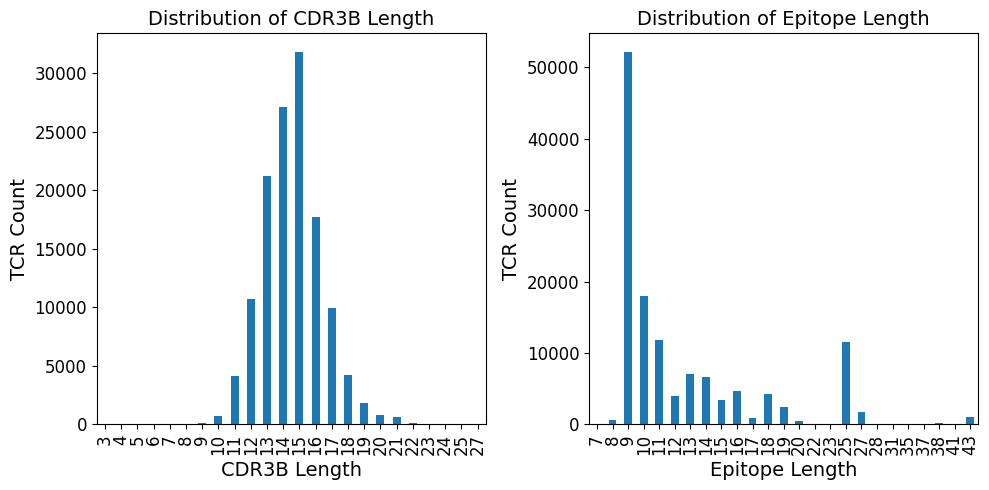

In [45]:
import matplotlib.pyplot as plt
cdr3b_lengths = all_data['CDR3B_length'].value_counts().sort_index()
epitope_lengths = all_data['Epitope_length'].value_counts().sort_index()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
cdr3b_lengths.plot(kind='bar')
plt.xlabel('CDR3B Length',fontsize=14)
plt.ylabel('TCR Count',fontsize=14)
plt.title('Distribution of CDR3B Length',fontsize=14)
plt.xticks(fontsize=12)  # 调整横轴标签的大小
plt.yticks(fontsize=12) 

plt.subplot(1, 2, 2)
epitope_lengths.plot(kind='bar')
plt.xlabel('Epitope Length',fontsize=14)
plt.ylabel('TCR Count',fontsize=14)
plt.title('Distribution of Epitope Length',fontsize=14)
plt.xticks(fontsize=12)  # 调整横轴标签的大小
plt.yticks(fontsize=12) 
plt.tight_layout()
 

plt.show()

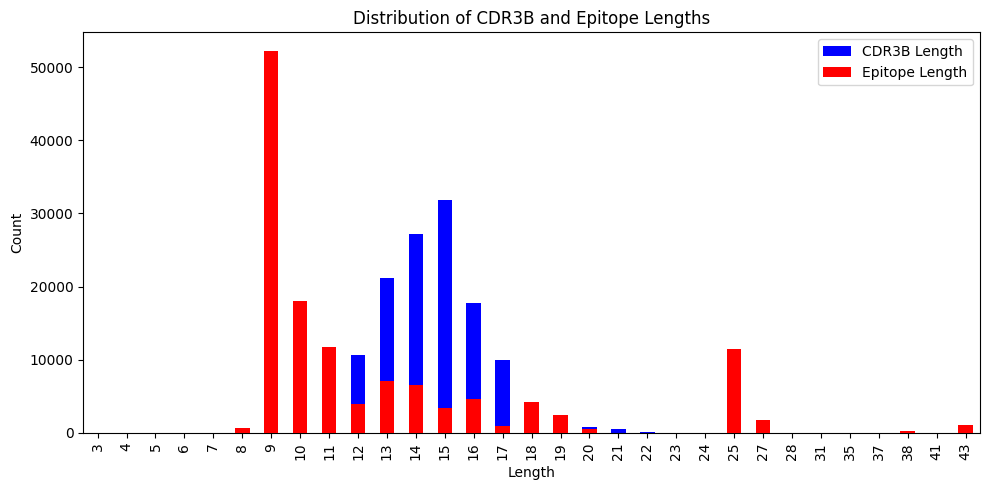

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

lengths = pd.concat([all_data['CDR3B_length'], all_data['Epitope_length']])
unique_lengths = sorted(lengths.unique())
cdr3b_lengths = all_data['CDR3B_length'].value_counts().reindex(unique_lengths, fill_value=0)
epitope_lengths = all_data['Epitope_length'].value_counts().reindex(unique_lengths, fill_value=0)

plt.figure(figsize=(10, 5))

smaller_series = cdr3b_lengths if cdr3b_lengths.sum() < epitope_lengths.sum() else epitope_lengths
larger_series = cdr3b_lengths if cdr3b_lengths.sum() >= epitope_lengths.sum() else epitope_lengths

larger_series.plot(kind='bar', color='blue', label='CDR3B Length')
smaller_series.plot(kind='bar', color='red', label='Epitope Length', zorder=10)

plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of CDR3B and Epitope Lengths')
plt.legend()

plt.tight_layout()
plt.show()


# 根据序列长度进行筛选

In [710]:
all_data=pd.concat([vdjdb_df,IEDB_df,dbPepNeo_df,TBAdb_df,Glanville_df,MIRA_df], axis=0)
all_data = all_data[all_data['CDR3B'].str.match(r'^C.*F$')]
all_data['CDR3B_length'] = all_data['CDR3B'].apply(len) 
all_data['Epitope_length'] = all_data['Epitope'].apply(len)
condition = ((all_data['CDR3B'].isin(all_data[all_data['vdjdb_score'] == 0]['CDR3B'])) & (all_data['Epitope'].isin(all_data[all_data['vdjdb_score'] == 0]['Epitope'])))
deleted_data = all_data[condition]
all_data = all_data[~condition]
print(deleted_data['database'].value_counts())
non_standard_aa_pattern = r'[^ACDEFGHIKLMNPQRSTVWY]'
special_chars_pattern = r'[!@#$%^&*(),.?":{}|<>]'
lowercase_pattern = r'[a-z]'
all_data = all_data[~all_data['CDR3B'].str.contains(special_chars_pattern, regex=True, na=False)]
all_data = all_data[~all_data['CDR3B'].str.contains(lowercase_pattern, regex=True, na=False)]
all_data = all_data[~all_data['CDR3B'].str.contains(non_standard_aa_pattern, regex=True, na=False)]
all_data = all_data[~all_data['Epitope'].str.contains(special_chars_pattern, regex=True, na=False)]
all_data = all_data[~all_data['Epitope'].str.contains(lowercase_pattern, regex=True, na=False)]
all_data = all_data[~all_data['Epitope'].str.contains(non_standard_aa_pattern, regex=True, na=False)]


filtered_df = all_data[(all_data['CDR3B_length'].between(10, 18)) & (all_data['Epitope_length'] == 9)]
epitope_counts = filtered_df['Epitope'].value_counts()
filtered_df.loc[:, 'Epitope_Count'] = filtered_df['Epitope'].map(epitope_counts)
filtered_df = filtered_df.sort_values('Epitope')
filtered_df

/tmp/ipykernel_40913/51795249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Epitope_Count'] = filtered_df['Epitope'].map(epitope_counts)


,CDR3B,Epitope,antigen_species,TRBV,TRBJ,MHC,ID,database,vdjdb_score,CDR3B_length,Epitope_length,Epitope_Count
203342,CASSQISNYGYTF,AAASATLAL,NaN,NaN,NaN,HLA-C*08:01,203342.0,IEDB,NaN,13,9,3
203344,CSAAPQMNTEAFF,AAASATLAL,NaN,NaN,NaN,HLA-C*08:01,203344.0,IEDB,NaN,13,9,3
203340,CASSLSGWEFEQYF,AAASATLAL,NaN,NaN,NaN,HLA-C*08:01,203340.0,IEDB,NaN,14,9,3
21259,CATSRDGAGLVNQPQHF,AAFKRSCLK,MCPyV,TRBV15*01,TRBJ1-5*01,HLA-A*03:01,21259.0,vdjdb,3.0,17,9,5
21261,CASSQDPGSSYNEQFF,AAFKRSCLK,MCPyV,TRBV4-3*01,TRBJ2-1*01,HLA-A*03:01,21261.0,vdjdb,3.0,16,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
83985,CASSVGPGGANVLTF,YYQLYSTQL,SARS-CoV-2,TRBV09-01,TRBJ02-06,MHCI,NaN,MIRA,NaN,15,9,16
84105,CASSLGDREQFF,YYQLYSTQL,SARS-CoV2,NaN,NaN,HLA class I,84105.0,IEDB,NaN,12,9,16
83983,CASSVANEQFF,YYQLYSTQL,SARS-CoV-2,TRBV09-01,TRBJ02-01,MHCI,NaN,MIRA,NaN,11,9,16
99486,CASSPGASGGAAEDTQYF,YYQLYSTQL,SARS-CoV2,NaN,NaN,HLA class I,99486.0,IEDB,NaN,18,9,16


In [711]:
print('all_tcr_epitope_pair:',len(filtered_df['CDR3B']))
print('unique_CDR3B:',len(pd.unique(filtered_df['CDR3B'])))
print('unique_Epitope:',len(pd.unique(filtered_df['Epitope'])))
print('unique_Epitope_Count:',len(pd.unique(filtered_df['Epitope_Count'])))

all_tcr_epitope_pair: 49129
unique_CDR3B: 47958
unique_Epitope: 623
unique_Epitope_Count: 109


In [712]:
greater_than_50 = filtered_df[filtered_df['Epitope_Count'] >= 50]
print('all_tcr_epitope_pair:',len(greater_than_50['CDR3B']))
print('unique_CDR3B:',len(pd.unique(greater_than_50['CDR3B'])))
print('unique_Epitope:',len(pd.unique(greater_than_50['Epitope'])))
print('unique_Epitope_Count:',len(pd.unique(greater_than_50['Epitope_Count'])))

all_tcr_epitope_pair: 45591
unique_CDR3B: 45041
unique_Epitope: 73
unique_Epitope_Count: 64


In [713]:
less_than_50 = filtered_df[filtered_df['Epitope_Count'] < 50]
print('all_tcr_epitope_pair:',len(less_than_50['CDR3B']))
print('unique_CDR3B:',len(pd.unique(less_than_50['CDR3B'])))
print('unique_Epitope:',len(pd.unique(less_than_50['Epitope'])))
print('unique_Epitope_Count:',len(pd.unique(less_than_50['Epitope_Count'])))

all_tcr_epitope_pair: 3538
unique_CDR3B: 3023
unique_Epitope: 550
unique_Epitope_Count: 45


In [714]:
greater_than_300 = filtered_df[filtered_df['Epitope_Count'] >=300]
print('all_tcr_epitope_pair:',len(greater_than_300['CDR3B']))
print('unique_CDR3B:',len(pd.unique(greater_than_300['CDR3B'])))
print('unique_Epitope:',len(pd.unique(greater_than_300['Epitope'])))
print('unique_Epitope_Count:',len(pd.unique(greater_than_300['Epitope_Count'])))

all_tcr_epitope_pair: 39987
unique_CDR3B: 39566
unique_Epitope: 25
unique_Epitope_Count: 23


In [715]:
greater_than_50.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/epitope_morethan_50.csv")

In [717]:
greater_than_300.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/epitope_morethan_300.csv")

# 设置数据集进行评估数据量大小对模型的影响

In [786]:
import pandas as pd
np.random.seed(42)
sampled300 = greater_than_300.groupby('Epitope').apply(lambda x: x.sample(300))
sampled300.reset_index(drop=True, inplace=True)
sampled300
sampled300.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/sampled300.csv")

In [787]:
np.random.seed(42)
sampled200 = sampled300.groupby('Epitope').apply(lambda x: x.sample(200))
sampled200.reset_index(drop=True, inplace=True)
sampled200
sampled200.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/sampled200.csv")

In [788]:
np.random.seed(42)
sampled100 = sampled200.groupby('Epitope').apply(lambda x: x.sample(100))
sampled100.reset_index(drop=True, inplace=True)
sampled100
sampled100.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/sampled100.csv")

In [789]:
np.random.seed(42)
sampled10 = sampled100.groupby('Epitope').apply(lambda x: x.sample(10))
sampled10.reset_index(drop=True, inplace=True)
sampled10
sampled10.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/sampled10.csv")

# 进行分层抽样分为训练集和测试集

In [765]:
train_df, test_df = train_test_split(greater_than_50, test_size=0.15, stratify=greater_than_50[['Epitope']])

<Figure size 600x400 with 0 Axes>

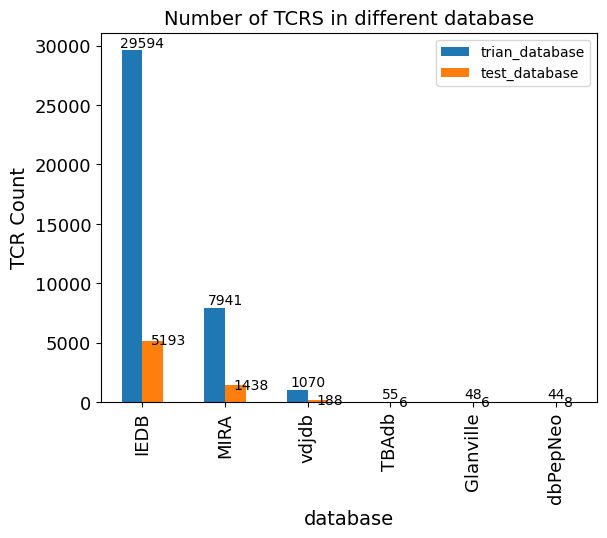

In [775]:
trian_database=train_df['database'].value_counts()
test_database=test_df['database'].value_counts()
combined_df = pd.concat([trian_database, test_database], axis=1)
combined_df.columns = ['trian_database', 'test_database'] 
plt.figure(figsize=(6,4)) 
ax = combined_df.plot(kind='bar')
for i, val in enumerate(combined_df.values):
    ax.text(i, val[0], str(val[0]), ha='center', va='bottom')  
 
    ax.text(i + 0.1, val[1], str(val[1]), ha='left', va='center')

ax.set_title('Number of TCRS in different database', fontsize=14)
ax.set_ylabel('TCR Count',fontsize=14)
ax.tick_params(axis='x', labelsize=13) 
ax.tick_params(axis='y', labelsize=13) 
ax.set_xlabel('database', fontsize=14)

plt.show()

In [776]:
train_df.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/train_df_more50.csv")
test_df.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/test_df_more50.csv")

In [1]:
import pandas as pd
train_df=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/train_df_more50.csv")
test_df=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/test_df_more50.csv")

In [3]:
print('unique_CDR3B:',len(pd.unique(test_df['CDR3B'])))
print('unique_Epitope:',len(pd.unique(test_df['Epitope'])))

unique_CDR3B: 6826
unique_Epitope: 73


# 阴性数据集的匹配

In [797]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
os.getcwd()
def outer_filter_negative_data(df,neg_tcr,ratio):
    unique_epitopes = df['Epitope'].unique()
    unique_tcrs = df['CDR3B'].unique()
    conversion_df = df[['Epitope', 'CDR3B']]
    positive_pairs = set([tuple(x) for x in conversion_df.to_numpy()])
    epitope_dist = df['Epitope'].value_counts()
    tcr_dist = df['CDR3B'].value_counts()
    epitope_freq_array = [epitope_dist[peptide] / len(df) for peptide in unique_epitopes]
    neg_pairs = set()
    neg_tcr_df = neg_tcr
    for i in range(len(unique_epitopes)):
        pairs_to_generate = round(epitope_dist[unique_epitopes[i]] * ratio)
        selected_tcrs = np.random.choice(neg_tcr_df['CDR3B'], size=pairs_to_generate, replace=False )
        new_pairs = [(unique_epitopes[i], tcr) for tcr in selected_tcrs]
        neg_pairs.update(new_pairs)
    negative_data = pd.DataFrame(neg_pairs, columns=['Epitope', 'CDR3B'])
    negative_data = negative_data.assign(Affinity=0)
    #df['Affinity'] = 1
    df.loc[:, 'Affinity'] = 1
    df = pd.concat([df, negative_data])
    df = df.reset_index(drop=True)
    return df

def Matches_negative_datasets(train_df1,test_df1,neg,path):
    df1_train=outer_filter_negative_data(train_df1,neg,1)
    df1_test=outer_filter_negative_data(test_df1,neg,1)
    df1_train.to_csv(path + "1_1train.csv")
    df1_test.to_csv(path + "1_1test.csv")
    df2_train=outer_filter_negative_data(train_df1,neg,2)
    df2_test=outer_filter_negative_data(test_df1,neg,2)
    df2_train.to_csv(path + "1_2train.csv")
    df2_test.to_csv(path + "1_2test.csv")
    df4_train=outer_filter_negative_data(train_df1,neg,4)
    df4_test=outer_filter_negative_data(test_df1,neg,4)
    df4_train.to_csv(path +"1_4train.csv")
    df4_test.to_csv(path +"1_4test.csv")
    df8_train=outer_filter_negative_data(train_df1,neg,8)
    df8_test=outer_filter_negative_data(test_df1,neg,8)
    df8_train.to_csv(path + "1_8train.csv")
    df8_test.to_csv(path + "1_8test.csv")
    df16_train=outer_filter_negative_data(train_df1,neg,16)
    df16_test=outer_filter_negative_data(test_df1,neg,16)
    df16_train.to_csv(path +"1_16train.csv")
    df16_test.to_csv(path +"1_16test.csv")


In [632]:
raw_Dean= pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/Dean_2016/output.csv", sep='\t')
raw_Dean

,"aminoAcid,vMaxResolved,jMaxResolved"
0,",TCRBV05,"
1,"CATTGTSGGPSQSTQYF,TCRBV10,"
2,"CASSLRVGGYGYTF,TCRBV07,"
3,",TCRBV01,"
4,"CASRRLGGLNTEAFF,TCRBV25,"
...,...
149527196,",TCRBV06,"
149527197,"CASSARLAGGYNEQFF,TCRBV09,"
149527198,"CATSRGETQYF,TCRBV15,TCRBD01,TCRBD02"
149527199,"CATLPLEQQYF,TCRBV15,"


In [633]:
new_columns = raw_Dean['aminoAcid,vMaxResolved,jMaxResolved'].str.split(',', expand=True)
raw_Dean['CDR3B'] = new_columns[0]
raw_Dean['TRBV'] = new_columns[1]
raw_Dean['TRBJ'] = new_columns[2]
raw_Dean.drop('aminoAcid,vMaxResolved,jMaxResolved', axis=1, inplace=True)

In [634]:
raw_Dean = raw_Dean.dropna(subset=['CDR3B'])
raw_Dean = raw_Dean[raw_Dean['CDR3B'].str.match(r'^C.*F$')]
non_standard_aa_pattern = r'[^ACDEFGHIKLMNPQRSTVWY]'
special_chars_pattern = r'[!@#$%^&*(),.?":{}|<>]'
lowercase_pattern = r'[a-z]'
raw_Dean = raw_Dean[~raw_Dean['CDR3B'].str.contains(special_chars_pattern, regex=True, na=False)]
raw_Dean = raw_Dean[~raw_Dean['CDR3B'].str.contains(lowercase_pattern, regex=True, na=False)]
raw_Dean = raw_Dean[~raw_Dean['CDR3B'].str.contains(non_standard_aa_pattern, regex=True, na=False)]
raw_Dean['CDR3B_length'] = raw_Dean['CDR3B'].apply(len)
raw_Dean.drop_duplicates(subset=['CDR3B'], keep='first', inplace=True)

In [635]:
raw_Dean.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/all_Dean.csv")

In [636]:
raw_Dean = raw_Dean[(raw_Dean['CDR3B_length'].between(10, 18))]

In [637]:
duplicates = raw_Dean[raw_Dean['CDR3B'].isin(all_data['CDR3B'])]
Dean = raw_Dean[~raw_Dean['CDR3B'].isin(duplicates['CDR3B'])]
print('some_neg_and_pos:',len(raw_Dean)-len(Dean))

some_neg_and_pos: 76471


In [780]:
path="./benchmark_dataset/Intersection_dataset/pair50/Dean/"
train_df1=train_df
test_df1=test_df
neg=Dean
Matches_negative_datasets(train_df1,test_df1,neg,path)

# TCRdb

In [638]:
import pandas as pd
import os

folder_path = "/home/luyanping/data/TCR_epitope_prediction/ourself_modle/database/TCRdb/TCR_data_all"
tsv_files = [f for f in os.listdir(folder_path) if f.endswith(".tsv")]
combined_data = pd.DataFrame()
for tsv_file in tsv_files:
    file_path = os.path.join(folder_path, tsv_file)
    data = pd.read_csv(file_path, sep="\t")
    required_columns = ["AASeq", "Vregion", "Jregion"]
    extracted_data = data[required_columns]
    combined_data = pd.concat([combined_data, extracted_data], ignore_index=True)
len(pd.unique(combined_data['AASeq'])) 
combined_data.to_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/TCRdb/combined_data.csv")

In [639]:
raw_TCRdb=pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/TCRdb/combined_data.csv")
raw_TCRdb

,Unnamed: 0,AASeq,Vregion,Jregion
0,0,CAIGGPPGRDRFPHQPQHF,TRBV10-3,TRBJ1-5
1,1,CASSPSRADTIYF,TRBV14,TRBJ1-3
2,2,CSARDLRYGYTF,TRBV20-1,TRBJ1-2
3,3,CASSQDRGSTPLHF,TRBV14,TRBJ1-6
4,4,CASSLGRGRGNTEAFF,TRBV13,TRBJ1-1
...,...,...,...,...
13904615,13904615,CAWEGSGRGYTF,TRBV30,TRBJ1-2
13904616,13904616,CSAKVGGDEQYF,TRBV20-1,TRBJ2-5
13904617,13904617,CSASDGGAGTDTQYF,TRBV20-1,TRBJ2-3
13904618,13904618,CVSKELGNEQFF,TRBV27,TRBJ2-1


In [640]:
new_column_names = {'AASeq': 'CDR3B',
                    'Vregion': 'TRBV',
                   'Jregion':'TRBJ'}
raw_TCRdb = raw_TCRdb.rename(columns=new_column_names)
raw_TCRdb

,Unnamed: 0,CDR3B,TRBV,TRBJ
0,0,CAIGGPPGRDRFPHQPQHF,TRBV10-3,TRBJ1-5
1,1,CASSPSRADTIYF,TRBV14,TRBJ1-3
2,2,CSARDLRYGYTF,TRBV20-1,TRBJ1-2
3,3,CASSQDRGSTPLHF,TRBV14,TRBJ1-6
4,4,CASSLGRGRGNTEAFF,TRBV13,TRBJ1-1
...,...,...,...,...
13904615,13904615,CAWEGSGRGYTF,TRBV30,TRBJ1-2
13904616,13904616,CSAKVGGDEQYF,TRBV20-1,TRBJ2-5
13904617,13904617,CSASDGGAGTDTQYF,TRBV20-1,TRBJ2-3
13904618,13904618,CVSKELGNEQFF,TRBV27,TRBJ2-1


In [641]:
raw_TCRdb = raw_TCRdb.dropna(subset=['CDR3B'])
raw_TCRdb = raw_TCRdb[raw_TCRdb['CDR3B'].str.match(r'^C.*F$')]
non_standard_aa_pattern = r'[^ACDEFGHIKLMNPQRSTVWY]'
special_chars_pattern = r'[!@#$%^&*(),.?":{}|<>]'
lowercase_pattern = r'[a-z]'
raw_TCRdb = raw_TCRdb[~raw_TCRdb['CDR3B'].str.contains(special_chars_pattern, regex=True, na=False)]
raw_TCRdb = raw_TCRdb[~raw_TCRdb['CDR3B'].str.contains(lowercase_pattern, regex=True, na=False)]
raw_TCRdb = raw_TCRdb[~raw_TCRdb['CDR3B'].str.contains(non_standard_aa_pattern, regex=True, na=False)]
raw_TCRdb['CDR3B_length'] = raw_TCRdb['CDR3B'].apply(len)
raw_TCRdb.drop_duplicates(subset=['CDR3B'], keep='first', inplace=True)
raw_TCRdb.to_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/Intersection_dataset/raw_data/al_TCRdb.csv")
raw_TCRdb = raw_TCRdb[(raw_TCRdb['CDR3B_length'].between(10, 18))]
raw_TCRdb

,Unnamed: 0,CDR3B,TRBV,TRBJ,CDR3B_length
1,1,CASSPSRADTIYF,TRBV14,TRBJ1-3,13
2,2,CSARDLRYGYTF,TRBV20-1,TRBJ1-2,12
3,3,CASSQDRGSTPLHF,TRBV14,TRBJ1-6,14
4,4,CASSLGRGRGNTEAFF,TRBV13,TRBJ1-1,16
5,5,CSASQGRMNYGYTF,TRBV20-1,TRBJ1-2,14
...,...,...,...,...,...
13904612,13904612,CATSRDGRGRTNTGELFF,TRBV15,TRBJ2-2,18
13904613,13904613,CATSRDVTGDSPLHF,TRBV15,TRBJ1-6,15
13904616,13904616,CSAKVGGDEQYF,TRBV20-1,TRBJ2-5,12
13904617,13904617,CSASDGGAGTDTQYF,TRBV20-1,TRBJ2-3,15


In [642]:
duplicates = raw_TCRdb[raw_TCRdb['CDR3B'].isin(all_data['CDR3B'])]
TCRdb = raw_TCRdb[~raw_TCRdb['CDR3B'].isin(duplicates['CDR3B'])]
print('some_neg_and_pos:',len(raw_TCRdb)-len(TCRdb))

some_neg_and_pos: 47742


In [781]:
path="./benchmark_dataset/Intersection_dataset/pair50/TCRdb/"
test_df1=test_df
train_df1=train_df
neg=TCRdb
Matches_negative_datasets(train_df1,test_df1,neg,path)

# unknow

In [782]:
def Matches_negative_datasets_unknow(test_df1,neg,path):
    df1_test=outer_filter_negative_data(test_df1,neg,1)
    df1_test.to_csv(path + "1_1test.csv")
    df2_test=outer_filter_negative_data(test_df1,neg,2)
    df2_test.to_csv(path + "1_2test.csv")
    df4_test=outer_filter_negative_data(test_df1,neg,4)
    df4_test.to_csv(path +"1_4test.csv")
    df8_test=outer_filter_negative_data(test_df1,neg,8)
    df8_test.to_csv(path + "1_8test.csv")
    df16_test=outer_filter_negative_data(test_df1,neg,16)
    df16_test.to_csv(path +"1_16test.csv")

In [49]:
import pandas as pd
less_than_50=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/epitope_less_50.csv")

In [51]:
pd.unique(less_than_50['database'])

array(['IEDB', 'vdjdb', 'dbPepNeo', 'MIRA', 'TBAdb'], dtype=object)

In [784]:
#Dean
path="./benchmark_dataset/Intersection_dataset/unkown/Dean/"
test_df1=less_than_50
neg=Dean
Matches_negative_datasets_unknow(test_df1,neg,path)

In [785]:
#TCRdb
path="./benchmark_dataset/Intersection_dataset/unkown/TCRdb/"
test_df1=less_than_50
neg=TCRdb
Matches_negative_datasets_unknow(test_df1,neg,path)

# Validaiton

In [1]:
import pandas as pd
McPAS = pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/McPAS_TCR/McPAS-TCR.csv",encoding='latin1')
McPAS['ID']= range(len(McPAS))
McPAS = McPAS[(McPAS['Species'] == 'Human')]
McPAS = McPAS[['CDR3.beta.aa','Pathology', 'Epitope.peptide','MHC','TRBV','TRBJ','ID']]
McPAS = McPAS.dropna(subset=['CDR3.beta.aa', 'Epitope.peptide','MHC'])
McPAS['database']='McPAS'
MHC=['HLA-A','HLA-B','HLA-C']
McPAS_cdr3 = McPAS[McPAS['MHC'].str.contains('|'.join(MHC))]
pd.unique(McPAS_cdr3.MHC)
column_mapping = {
    "CDR3.beta.aa": "CDR3B",
    "Pathology": "antigen_species",
    "Epitope.peptide": "Epitope",
    "MHC": "MHC",
    "TRBV":"TRBV",
    "TRBJ": "TRBJ",
    "ID":"ID",
    'database':'database'}

McPAS_df=McPAS_cdr3.rename(columns=column_mapping)
McPAS_df

/tmp/ipykernel_4514/4020138601.py:2: DtypeWarning: Columns (13,17,24,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  McPAS = pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/McPAS_TCR/McPAS-TCR.csv",encoding='latin1')


,CDR3B,antigen_species,Epitope,MHC,TRBV,TRBJ,ID,database
92,CASSLGNEQF,Melanoma,EAAGIGILTV,HLA-A*02,NaN,TRBJ2-1,92,McPAS
93,CASSLGVATGELF,Melanoma,EAAGIGILTV,HLA-A*02,NaN,TRBJ2-2,93,McPAS
94,CASSQEEGGGSWGNTIYF,Melanoma,EAAGIGILTV,HLA-A*02,NaN,TRBJ1-3,94,McPAS
95,CASSQEGLAGASQYF,Melanoma,EAAGIGILTV,HLA-A*02,NaN,TRBJ2-4,95,McPAS
96,CASSQETDIVFNOPQHF,Melanoma,EAAGIGILTV,HLA-A*02,NaN,TRBJ1-5,96,McPAS
...,...,...,...,...,...,...,...,...
39676,CSVGTGGTNEKLFF,Epstein Barr virus (EBV),GLCTLVAML,HLA-A*02:01,TRBV29-1,TRBJ5-1,39676,McPAS
39677,CASSEDGMNTEAFF,Epstein Barr virus (EBV),CLGGLLTMV,HLA-A*02:01,TRBV10-2*02,TRBJ21-1,39677,McPAS
39678,CASSYQGGNYGYTF,Epstein Barr virus (EBV),FLYALALLL,HLA-A*02:01,TRBV6-5*01,TRBJ17-1,39678,McPAS
39679,CASSKQGGNIQYF,Epstein Barr virus (EBV),FLYALALLL,HLA-A*02:01,TRBV6-5*01,TRBJ17-1,39679,McPAS


In [2]:
McPAS_df = McPAS_df [McPAS_df ['CDR3B'].str.match(r'^C.*F$')]
McPAS_df ['CDR3B_length'] = McPAS_df ['CDR3B'].apply(len) 
McPAS_df ['Epitope_length'] = McPAS_df ['Epitope'].apply(len)

non_standard_aa_pattern = r'[^ACDEFGHIKLMNPQRSTVWY]'
special_chars_pattern = r'[!@#$%^&*(),.?":{}|<>]'
lowercase_pattern = r'[a-z]'
McPAS_df  = McPAS_df [~McPAS_df ['CDR3B'].str.contains(special_chars_pattern, regex=True, na=False)]
McPAS_df  = McPAS_df [~McPAS_df ['CDR3B'].str.contains(lowercase_pattern, regex=True, na=False)]
McPAS_df  = McPAS_df [~McPAS_df ['CDR3B'].str.contains(non_standard_aa_pattern, regex=True, na=False)]
McPAS_df  = McPAS_df [~McPAS_df ['Epitope'].str.contains(special_chars_pattern, regex=True, na=False)]
McPAS_df  = McPAS_df [~McPAS_df ['Epitope'].str.contains(lowercase_pattern, regex=True, na=False)]
McPAS_df  = McPAS_df [~McPAS_df ['Epitope'].str.contains(non_standard_aa_pattern, regex=True, na=False)]
McPAS_df = McPAS_df [(McPAS_df ['CDR3B_length'].between(10, 18))]
McPAS_df = McPAS_df [(McPAS_df ['Epitope_length']==9)]
McPAS_df

/tmp/ipykernel_4514/2247947644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  McPAS_df ['CDR3B_length'] = McPAS_df ['CDR3B'].apply(len)
/tmp/ipykernel_4514/2247947644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  McPAS_df ['Epitope_length'] = McPAS_df ['Epitope'].apply(len)


,CDR3B,antigen_species,Epitope,MHC,TRBV,TRBJ,ID,database,CDR3B_length,Epitope_length
146,CASSLGSSYEQYF,Melanoma,YLEPGPVTA,HLA-A2,TRBV27,TRBJ2-7,146,McPAS,13,9
147,CASLAGQGYNEQF,Melanoma,SAYGEPRKL,HLA-Cw* 16:01,TRBV4,TRBJ2-1,147,McPAS,13,9
148,CASLGAQNNEQF,Melanoma,AARAVFLAL,HLA-Cw* 16:01,TRBV12,TRBJ2-1,148,McPAS,12,9
149,CASRLWFWALEAF,Melanoma,SAYGEPRKL,HLA-Cw* 16:01,TRBV6,TRBJ1-1,149,McPAS,13,9
150,CASSYSTGDEQYF,Melanoma,AARAVFLAL,HLA-Cw* 16:01,TRBV6,TRBJ2-7,150,McPAS,13,9
...,...,...,...,...,...,...,...,...,...,...
39676,CSVGTGGTNEKLFF,Epstein Barr virus (EBV),GLCTLVAML,HLA-A*02:01,TRBV29-1,TRBJ5-1,39676,McPAS,14,9
39677,CASSEDGMNTEAFF,Epstein Barr virus (EBV),CLGGLLTMV,HLA-A*02:01,TRBV10-2*02,TRBJ21-1,39677,McPAS,14,9
39678,CASSYQGGNYGYTF,Epstein Barr virus (EBV),FLYALALLL,HLA-A*02:01,TRBV6-5*01,TRBJ17-1,39678,McPAS,14,9
39679,CASSKQGGNIQYF,Epstein Barr virus (EBV),FLYALALLL,HLA-A*02:01,TRBV6-5*01,TRBJ17-1,39679,McPAS,13,9


In [3]:
greater_than_50=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/epitope_morethan_50.csv")
greater_than_50

,Unnamed: 0,CDR3B,Epitope,antigen_species,TRBV,TRBJ,MHC,ID,database,vdjdb_score,CDR3B_length,Epitope_length,Epitope_Count
0,62462,CASRDLADTQYF,ALSKGVHFV,SARS-CoV2,NaN,NaN,HLA class I,62462.0,IEDB,NaN,12,9,227
1,60996,CASGLAGDSYNEQFF,ALSKGVHFV,SARS-CoV2,NaN,NaN,HLA class I,60996.0,IEDB,NaN,15,9,227
2,93996,CASSLMGGYNEQFF,ALSKGVHFV,SARS-CoV2,NaN,NaN,HLA class I,93996.0,IEDB,NaN,14,9,227
3,94040,CASSLQGASSYEQYF,ALSKGVHFV,SARS-CoV2,NaN,NaN,HLA class I,94040.0,IEDB,NaN,15,9,227
4,116654,CASSSSGTFNLYEQYF,ALSKGVHFV,SARS-CoV2,NaN,NaN,HLA class I,116654.0,IEDB,NaN,16,9,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45586,163884,CAISEGTLSSYNEQFF,YVLDHLIVV,Human herpesvirus 4 (Epstein Barr virus),NaN,NaN,HLA-A*02:01,163884.0,IEDB,NaN,16,9,6766
45587,181726,CATSDGQDEQYF,YVLDHLIVV,Human herpesvirus 4 (Epstein Barr virus),NaN,NaN,HLA-A*02:01,181726.0,IEDB,NaN,12,9,6766
45588,181734,CATSDLKTGGEYEQYF,YVLDHLIVV,Human herpesvirus 4 (Epstein Barr virus),NaN,NaN,HLA-A*02:01,181734.0,IEDB,NaN,16,9,6766
45589,181844,CASTDLAGGLTDTQYF,YVLDHLIVV,Human herpesvirus 4 (Epstein Barr virus),NaN,NaN,HLA-A*02:01,181844.0,IEDB,NaN,16,9,6766


In [4]:
McPAS_fiter = McPAS_df[~McPAS_df['Epitope'].isin(greater_than_50['Epitope'])]
McPAS_fiter

,CDR3B,antigen_species,Epitope,MHC,TRBV,TRBJ,ID,database,CDR3B_length,Epitope_length
146,CASSLGSSYEQYF,Melanoma,YLEPGPVTA,HLA-A2,TRBV27,TRBJ2-7,146,McPAS,13,9
147,CASLAGQGYNEQF,Melanoma,SAYGEPRKL,HLA-Cw* 16:01,TRBV4,TRBJ2-1,147,McPAS,13,9
148,CASLGAQNNEQF,Melanoma,AARAVFLAL,HLA-Cw* 16:01,TRBV12,TRBJ2-1,148,McPAS,12,9
149,CASRLWFWALEAF,Melanoma,SAYGEPRKL,HLA-Cw* 16:01,TRBV6,TRBJ1-1,149,McPAS,13,9
150,CASSYSTGDEQYF,Melanoma,AARAVFLAL,HLA-Cw* 16:01,TRBV6,TRBJ2-7,150,McPAS,13,9
...,...,...,...,...,...,...,...,...,...,...
39032,CSAETGLSYEQYF,Tumor associated antigen (TAA),FLCMKALLL,HLA-A2:01,TRBV20-1,TRBJ2-7,39032,McPAS,13,9
39668,CAISDPRDSYEQYF,Epstein Barr virus (EBV),YPLHEQHGM,HLA-B*35:01,TRBV10-3,TRBJ19-1,39668,McPAS,14,9
39677,CASSEDGMNTEAFF,Epstein Barr virus (EBV),CLGGLLTMV,HLA-A*02:01,TRBV10-2*02,TRBJ21-1,39677,McPAS,14,9
39678,CASSYQGGNYGYTF,Epstein Barr virus (EBV),FLYALALLL,HLA-A*02:01,TRBV6-5*01,TRBJ17-1,39678,McPAS,14,9


In [5]:
McPAS_fiter = McPAS_fiter[~McPAS_fiter['CDR3B'].isin(greater_than_50['CDR3B'])]
McPAS_fiter.to_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/10cross_validation/raw_data/unkown_validaiton.csv")

# pair300

In [795]:
def Matches_negative_dataCount(test_df1,neg,path):
    df1_test=outer_filter_negative_data(test_df1,neg,1)
    df1_test.to_csv(path + "1_1train.csv")
    df2_test=outer_filter_negative_data(test_df1,neg,2)
    df2_test.to_csv(path + "1_2train.csv")
    df4_test=outer_filter_negative_data(test_df1,neg,4)
    df4_test.to_csv(path +"1_4train.csv")
    df8_test=outer_filter_negative_data(test_df1,neg,8)
    df8_test.to_csv(path + "1_8train.csv")
    df16_test=outer_filter_negative_data(test_df1,neg,16)
    df16_test.to_csv(path +"1_16train.csv")

In [54]:
pd.unique(greater_than_300['database'])

array(['IEDB', 'MIRA', 'vdjdb', 'Glanville', 'TBAdb'], dtype=object)

In [52]:
greater_than_300=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/epitope_morethan_300.csv")

<Figure size 600x400 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


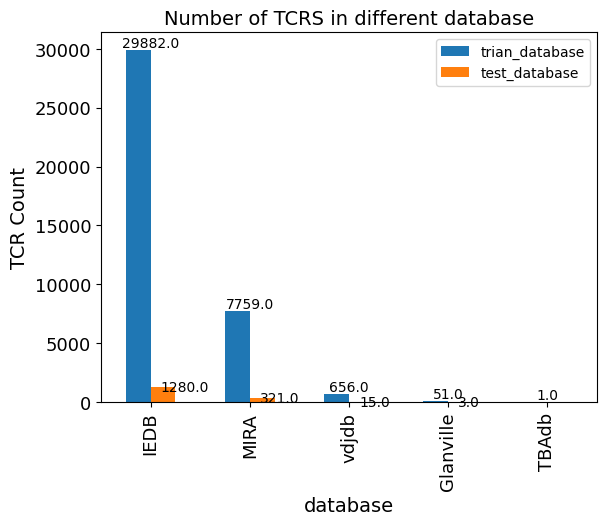

In [791]:
sampled_300=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/sampled300.csv")
df1_unique = greater_than_300[~greater_than_300['CDR3B'].isin(sampled_300['CDR3B'])]
df1_unique
train, test = train_test_split(df1_unique, test_size=0.05,random_state=123,stratify=df1_unique[['Epitope']])
test.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/test_morethan_300.csv")
trian_more300 = greater_than_300[~greater_than_300['CDR3B'].isin(test['CDR3B'])]
trian_more300.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/trian_morethan_300.csv")
trian_database=trian_more300['database'].value_counts()
test_database=test['database'].value_counts()
combined_df = pd.concat([trian_database, test_database], axis=1)
combined_df.columns = ['trian_database', 'test_database'] 
plt.figure(figsize=(6,4)) 
ax = combined_df.plot(kind='bar')
for i, val in enumerate(combined_df.values):
    ax.text(i, val[0], str(val[0]), ha='center', va='bottom')  
    ax.text(i + 0.1, val[1], str(val[1]), ha='left', va='center')
ax.set_title('Number of TCRS in different database', fontsize=14)
ax.set_ylabel('TCR Count',fontsize=14)
ax.tick_params(axis='x', labelsize=13) 
ax.tick_params(axis='y', labelsize=13) 
ax.set_xlabel('database', fontsize=14)
plt.show()

In [ ]:
#more300

In [798]:
path="./benchmark_dataset/Intersection_dataset/pair300/raw300/Dean/"
test_df1=test
train_df1=trian_more300
neg=Dean
Matches_negative_datasets(train_df1,test_df1,neg,path)

path="./benchmark_dataset/Intersection_dataset/pair300/raw300/TCRdb/"
test_df1=test
train_df1=trian_more300
neg=TCRdb
Matches_negative_datasets(train_df1,test_df1,neg,path)

In [ ]:
#300

In [799]:
path="./benchmark_dataset/Intersection_dataset/pair300/300/Dean/"
test_df1=sampled300
neg=Dean
Matches_negative_dataCount(test_df1,neg,path)


path="./benchmark_dataset/Intersection_dataset/pair300/300/TCRdb/"
test_df1=sampled300
neg=TCRdb
Matches_negative_dataCount(test_df1,neg,path)

In [800]:
#200

In [ ]:
path="./benchmark_dataset/Intersection_dataset/pair300/200/Dean/"
test_df1=sampled200
neg=Dean
Matches_negative_dataCount(test_df1,neg,path)


path="./benchmark_dataset/Intersection_dataset/pair300/200/TCRdb/"
test_df1=sampled200
neg=TCRdb
Matches_negative_dataCount(test_df1,neg,path)

In [802]:
#100

In [803]:
path="./benchmark_dataset/Intersection_dataset/pair300/100/Dean/"
test_df1=sampled100
neg=Dean
Matches_negative_dataCount(test_df1,neg,path)


path="./benchmark_dataset/Intersection_dataset/pair300/100/TCRdb/"
test_df1=sampled100
neg=TCRdb
Matches_negative_dataCount(test_df1,neg,path)

In [804]:
#10

In [805]:
path="./benchmark_dataset/Intersection_dataset/pair300/10/Dean/"
test_df1=sampled10
neg=Dean
Matches_negative_dataCount(test_df1,neg,path)

path="./benchmark_dataset/Intersection_dataset/pair300/10/TCRdb/"
test_df1=sampled10
neg=TCRdb
Matches_negative_dataCount(test_df1,neg,path)

In [7]:
df

,cluster,PR,NR,T
0,cluster1,1,0,1
1,cluster1,2,3,4
2,cluster1,3,4,5
3,cluster1,4,5,6
4,cluster1,5,6,7
5,cluster1,6,7,8
6,cluster2,7,8,9
7,cluster2,8,9,10
8,cluster2,9,10,11
9,cluster2,10,11,12


# inner

In [815]:
def negative_data(df,ratio):
    def random_recombination(df, epitope_dist, tcr_dist, ratio):
        unique_epitopes = df['Epitope'].unique()
        unique_tcrs = df['CDR3B'].unique()
        conversion_df = df[['Epitope', 'CDR3B']]
        positive_pairs = set([tuple(x) for x in conversion_df.to_numpy()])
        epitope_freq_array = [epitope_dist[peptide] / len(df) for peptide in unique_epitopes]
        tcr_freq_array = [tcr_dist[tcr] / len(df) for tcr in unique_tcrs]    
        neg_pairs = set()
        for pep in unique_epitopes:
            i = 0
            pairs_to_generate = round(epitope_dist[pep] * ratio)
            while i < pairs_to_generate:
                tcr = np.random.choice(unique_tcrs, p=tcr_freq_array)
                pair = (pep, tcr)
                if pair not in positive_pairs and pair not in neg_pairs:
                    neg_pairs.add(pair)
                    i += 1        
        negative_data = pd.DataFrame(neg_pairs, columns = ['Epitope', 'CDR3B'])
        negative_data = negative_data.assign(Affinity=0)
        return negative_data
    df.loc[:, 'Affinity'] = 1
    epitope_distribution = df['Epitope'].value_counts()
    tcr_distribution = df['CDR3B'].value_counts()
    negative_data = random_recombination(df, epitope_distribution, tcr_distribution, ratio)
    df = pd.concat([df, negative_data])
    df = df.reset_index(drop=True)
    return df

def inner_neg(train_df1,test_df1,path):
    df1_train=negative_data(train_df1,1)
    df1_test=negative_data(test_df1,1)
    df1_train.to_csv(path + "1_1train.csv")
    df1_test.to_csv(path + "1_1test.csv")
    df2_train=negative_data(train_df1,2)
    df2_test=negative_data(test_df1,2)
    df2_train.to_csv(path + "1_2train.csv")
    df2_test.to_csv(path + "1_2test.csv")
    df4_train=negative_data(train_df1,4)
    df4_test=negative_data(test_df1,4)
    df4_train.to_csv(path +"1_4train.csv")
    df4_test.to_csv(path +"1_4test.csv")
  #  df8_train=negative_data(train_df1,8)
 #   df8_test=negative_data(test_df1,8)
  #  df8_train.to_csv(path + "1_8train.csv")
   # df8_test.to_csv(path + "1_8test.csv")
   # df16_train=negative_data(train_df1,16)
  #  df16_test=negative_data(test_df1,16)
   # df16_train.to_csv(path +"1_16train.csv")
   # df16_test.to_csv(path +"1_16test.csv")


In [816]:
#more300

In [817]:
path="./benchmark_dataset/Intersection_dataset/pair300/raw300/inner/"
test_df1=test
train_df1=trian_more300
inner_neg(train_df1,test_df1,path)


In [818]:
#pair50

In [819]:
train_df=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/train_df_more50.csv")
test_df=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/test_df_more50.csv")

In [820]:
path="./benchmark_dataset/Intersection_dataset/pair50/inner/"
test_df1=test_df
train_df1=train_df
inner_neg(train_df1,test_df1,path)


In [824]:
def inner_neg_test(test_df1,path):
    df1_test=negative_data(test_df1,1)
    df1_test.to_csv(path + "1_1test.csv")
    df2_test=negative_data(test_df1,2)
    df2_test.to_csv(path + "1_2test.csv")
    df4_test=negative_data(test_df1,4)
    df4_test.to_csv(path +"1_4test.csv")
   # df8_test=negative_data(test_df1,8)
  #  df8_test.to_csv(path + "1_8test.csv")
  #  df16_test=negative_data(test_df1,16)
  #  df16_test.to_csv(path +"1_16test.csv")


In [825]:
#

In [826]:
test_df=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/epitope_less_50.csv")
path="./benchmark_dataset/Intersection_dataset/unkown/inner/"
test_df1=test_df
inner_neg_test(test_df1,path)


In [827]:
def inner_neg_trian(train_df1,path):
    df1_train=negative_data(train_df1,1)
    df1_train.to_csv(path + "1_1train.csv")
    df2_train=negative_data(train_df1,2)
    df2_train.to_csv(path + "1_2train.csv")
    df4_train=negative_data(train_df1,4)
    df4_train.to_csv(path +"1_4train.csv")
   # df8_train=negative_data(train_df1,8)
  #  df8_train.to_csv(path + "1_8train.csv")
   # df16_train=negative_data(train_df1,16)
  #  df16_train.to_csv(path +"1_16train.csv")

In [828]:
#300
path="./benchmark_dataset/Intersection_dataset/pair300/300/inner/"
train_df1=sampled300
inner_neg_trian(train_df1,path)

In [829]:
path="./benchmark_dataset/Intersection_dataset/pair300/200/inner/"
train_df1=sampled200
inner_neg_trian(train_df1,path)

In [830]:
path="./benchmark_dataset/Intersection_dataset/pair300/100/inner/"
train_df1=sampled100
inner_neg_trian(train_df1,path)

In [831]:
path="./benchmark_dataset/Intersection_dataset/pair300/10/inner/"
train_df1=sampled10
inner_neg_trian(train_df1,path)

# 验证集收集和整理

In [838]:
import pandas as pd
McPAS = pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/McPAS_TCR/McPAS-TCR.csv",encoding='latin1')
McPAS['ID']= range(len(McPAS))
McPAS = McPAS[(McPAS['Species'] == 'Human')]
McPAS = McPAS[['CDR3.beta.aa','Pathology', 'Epitope.peptide','MHC','TRBV','TRBJ','ID']]
McPAS = McPAS.dropna(subset=['CDR3.beta.aa', 'Epitope.peptide','MHC'])
McPAS['database']='McPAS'
MHC=['HLA-A','HLA-B','HLA-C']
McPAS_cdr3 = McPAS[McPAS['MHC'].str.contains('|'.join(MHC))]
pd.unique(McPAS_cdr3.MHC)
column_mapping = {
    "CDR3.beta.aa": "CDR3B",
    "Pathology": "antigen_species",
    "Epitope.peptide": "Epitope",
    "MHC": "MHC",
    "TRBV":"TRBV",
    "TRBJ": "TRBJ",
    "ID":"ID",
    'database':'database'}

McPAS_df=McPAS_cdr3.rename(columns=column_mapping)
McPAS_df
McPAS_df = McPAS_df[McPAS_df['CDR3B'].str.match(r'^C.*F$')]
McPAS_df['CDR3B_length'] = McPAS_df['CDR3B'].apply(len) 
McPAS_df['Epitope_length'] = McPAS_df['Epitope'].apply(len)
McPAS_df.drop_duplicates(subset=['CDR3B', 'Epitope'], keep='first', inplace=True)
non_standard_aa_pattern = r'[^ACDEFGHIKLMNPQRSTVWY]'
special_chars_pattern = r'[!@#$%^&*(),.?":{}|<>]'
lowercase_pattern = r'[a-z]'
McPAS_df = McPAS_df[~McPAS_df['CDR3B'].str.contains(special_chars_pattern, regex=True, na=False)]
McPAS_df = McPAS_df[~McPAS_df['CDR3B'].str.contains(lowercase_pattern, regex=True, na=False)]
McPAS_df = McPAS_df[~McPAS_df['CDR3B'].str.contains(non_standard_aa_pattern, regex=True, na=False)]
McPAS_df = McPAS_df[~McPAS_df['Epitope'].str.contains(special_chars_pattern, regex=True, na=False)]
McPAS_df = McPAS_df[~McPAS_df['Epitope'].str.contains(lowercase_pattern, regex=True, na=False)]
McPAS_df = McPAS_df[~McPAS_df['Epitope'].str.contains(non_standard_aa_pattern, regex=True, na=False)]
McPAS_df = McPAS_df[(McPAS_df['CDR3B_length'].between(10, 18)) & (McPAS_df['Epitope_length'] == 9)]
McPAS_df


/tmp/ipykernel_40913/3695385022.py:2: DtypeWarning: Columns (13,17,24,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  McPAS = pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/McPAS_TCR/McPAS-TCR.csv",encoding='latin1')


,CDR3B,antigen_species,Epitope,MHC,TRBV,TRBJ,ID,database,CDR3B_length,Epitope_length
146,CASSLGSSYEQYF,Melanoma,YLEPGPVTA,HLA-A2,TRBV27,TRBJ2-7,146,McPAS,13,9
147,CASLAGQGYNEQF,Melanoma,SAYGEPRKL,HLA-Cw* 16:01,TRBV4,TRBJ2-1,147,McPAS,13,9
148,CASLGAQNNEQF,Melanoma,AARAVFLAL,HLA-Cw* 16:01,TRBV12,TRBJ2-1,148,McPAS,12,9
149,CASRLWFWALEAF,Melanoma,SAYGEPRKL,HLA-Cw* 16:01,TRBV6,TRBJ1-1,149,McPAS,13,9
150,CASSYSTGDEQYF,Melanoma,AARAVFLAL,HLA-Cw* 16:01,TRBV6,TRBJ2-7,150,McPAS,13,9
...,...,...,...,...,...,...,...,...,...,...
39668,CAISDPRDSYEQYF,Epstein Barr virus (EBV),YPLHEQHGM,HLA-B*35:01,TRBV10-3,TRBJ19-1,39668,McPAS,14,9
39677,CASSEDGMNTEAFF,Epstein Barr virus (EBV),CLGGLLTMV,HLA-A*02:01,TRBV10-2*02,TRBJ21-1,39677,McPAS,14,9
39678,CASSYQGGNYGYTF,Epstein Barr virus (EBV),FLYALALLL,HLA-A*02:01,TRBV6-5*01,TRBJ17-1,39678,McPAS,14,9
39679,CASSKQGGNIQYF,Epstein Barr virus (EBV),FLYALALLL,HLA-A*02:01,TRBV6-5*01,TRBJ17-1,39679,McPAS,13,9


In [841]:
all_data=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/epitope_morethan_50.csv")
McPAS_df = McPAS_df[~McPAS_df['CDR3B'].isin(all_data['CDR3B'])]
McPAS_df = McPAS_df[McPAS_df['Epitope'].isin(all_data['Epitope'])]
McPAS_df.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/Validation_McPAS.csv")
McPAS_df

,CDR3B,antigen_species,Epitope,MHC,TRBV,TRBJ,ID,database,CDR3B_length,Epitope_length
319,CAMREDRDNYGKNFVF,Epstein Barr virus (EBV),GLCTLVAML,HLA-A*02,TRBV9,TRBJ2-3,319,McPAS,16,9
320,CASSEGNVAPGELF,Epstein Barr virus (EBV),GLCTLVAML,HLA-A*02,TRBV2,TRBJ2-2,320,McPAS,14,9
322,CASSQSPGGTQYF,Epstein Barr virus (EBV),GLCTLVAML,HLA-A*02,TRBV14,TRBJ2-3,322,McPAS,13,9
324,CASSSGELSAGELF,Epstein Barr virus (EBV),GLCTLVAML,HLA-A*02,TRBV9,TRBJ2-2,324,McPAS,14,9
325,CASSSGSGGYYNEQF,Epstein Barr virus (EBV),GLCTLVAML,HLA-A*02,TRBV27,TRBJ2-1,325,McPAS,15,9
...,...,...,...,...,...,...,...,...,...,...
21795,CASSYFGLAFQETQYF,Influenza,GILGFVFTL,HLA-A*02,TRBV6-6,TRBJ2-5,21795,McPAS,16,9
21796,CASSGLAGARNEQYF,Influenza,GILGFVFTL,HLA-A*02,TRBV6-6,TRBJ2-7,21796,McPAS,15,9
21797,CASTPHRGPSYEQYF,Influenza,GILGFVFTL,HLA-A*02,TRBV7-8,TRBJ2-7,21797,McPAS,15,9
21798,CASTPSSGSAGNTIYF,Influenza,GILGFVFTL,HLA-A*02,TRBV7-9,TRBJ1-3,21798,McPAS,16,9


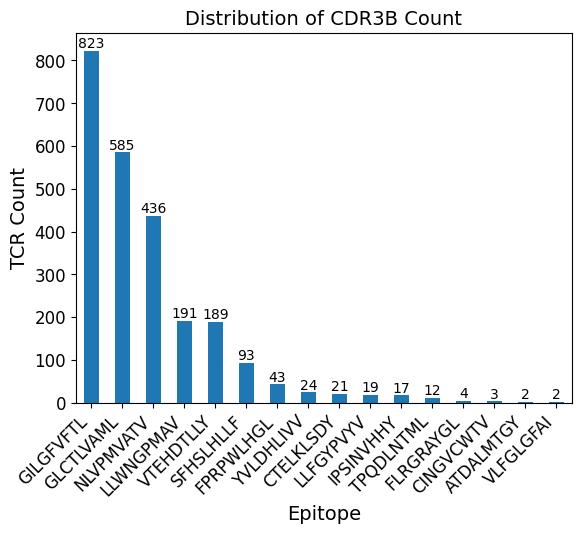

In [859]:
cdr3count = McPAS_df['Epitope'].value_counts()
ax = cdr3count.plot(kind='bar')
plt.xlabel('Epitope', fontsize=14)
plt.ylabel('TCR Count', fontsize=14)
plt.title('Distribution of CDR3B Count', fontsize=14)
plt.xticks(fontsize=12,rotation=45, ha='right')
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust the top margin
plt.show()


In [861]:
len(Dean)

57162938

In [860]:
mc_Dean=Dean[~Dean['CDR3B'].isin(McPAS_df['CDR3B'])]
len(mc_Dean)

57162715

In [862]:
mc_TCRdb=TCRdb[~TCRdb['CDR3B'].isin(McPAS_df['CDR3B'])]
len(mc_TCRdb)

7108132

In [863]:
def Matches_negative_Validation(test_df1,neg,path):
    df1_test=outer_filter_negative_data(test_df1,neg,1)
    df1_test.to_csv(path + "1_1Validation.csv")
    df2_test=outer_filter_negative_data(test_df1,neg,2)
    df2_test.to_csv(path + "1_2Validation.csv")
    df4_test=outer_filter_negative_data(test_df1,neg,4)
    df4_test.to_csv(path +"1_4Validation.csv")
    df8_test=outer_filter_negative_data(test_df1,neg,8)
    df8_test.to_csv(path + "1_8Validation.csv")
    df16_test=outer_filter_negative_data(test_df1,neg,16)
    df16_test.to_csv(path +"1_16Validation.csv")

In [864]:
#Dean

In [865]:
test_df1=McPAS_df
neg=mc_Dean
path="./benchmark_dataset/Intersection_dataset/Validation/Dean/"
Matches_negative_Validation(test_df1,neg,path)

In [ ]:
#inner

In [845]:
train_df1=McPAS_df
path="./benchmark_dataset/Intersection_dataset/Validation/inner/"
df1_train=negative_data(train_df1,1)
df1_train.to_csv(path + "1_1Validation.csv")
df2_train=negative_data(train_df1,2)

#在匹配2的时候就无法
df2_train.to_csv(path + "1_2Validation.csv")
df4_train=negative_data(train_df1,4)
df4_train.to_csv(path +"1_4Validation.csv")


KeyboardInterrupt: 

In [ ]:
#TCRdb

In [866]:
test_df1=McPAS_df
neg=mc_TCRdb
path="./benchmark_dataset/Intersection_dataset/Validation/TCRdb/"
Matches_negative_Validation(test_df1,neg,path)

# 评估时间和内存的数据集整理

In [22]:
import random
import pandas as pd
data=pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/Intersection_dataset/pair50/Dean/1_16train.csv")
row_numbers = [100, 1000, 10000, 100000, 1000000]
total_rows = len(data)
for n in row_numbers:
    selected_rows = []
    while len(selected_rows) < n:
        selected_rows.extend(random.sample(range(total_rows), min(n - len(selected_rows), total_rows)))
    file_name = f"/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/Intersection_dataset/time/data_{n}.csv"
    selected_data = data.iloc[selected_rows]
    selected_data.to_csv(file_name, index=False)


/tmp/ipykernel_5772/72704725.py:3: DtypeWarning: Columns (3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/Intersection_dataset/pair50/Dean/1_16train.csv")


In [34]:
import random
import pandas as pd
data=pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/Intersection_dataset/pair50/Dean/1_16train.csv")
subset_lengths  = [100, 1000, 10000, 100000, 1000000]
df_sorted = data.sort_values(by='Epitope').reset_index(drop=True)
df_sorted['Affinity'] = (df_sorted.index % 2).astype(int)
subsets = []

for length in subset_lengths:
    if length <= len(df_sorted):
        subset = df_sorted.head(length)
    else:
        subset = pd.concat([df_sorted] * (length // len(df_sorted) + 1))
        subset = subset.head(length)
    
    subsets.append(subset)

for i, subset in enumerate(subsets):
    subset.to_csv(f'/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/Intersection_dataset/time/data_{subset_lengths[i]}.csv', index=False)

/tmp/ipykernel_5772/3996286377.py:3: DtypeWarning: Columns (3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/Intersection_dataset/pair50/Dean/1_16train.csv")


# 交叉验证数据集整理

In [33]:
import pandas as pd
test=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/test_df_more50.csv")
test['Affinity']=1
CDR3B=pd.DataFrame(test['CDR3B'])
CDR3B=CDR3B.drop_duplicates()
Epitope=pd.DataFrame(test['Epitope'])
Epitope=Epitope.drop_duplicates()
Cross_verification = pd.DataFrame({'Epitope': [i for i in Epitope['Epitope'] for _ in CDR3B['CDR3B']],
                     'CDR3B': [j for _ in Epitope['Epitope'] for j in CDR3B['CDR3B']]})
merged_df = pd.merge(Cross_verification, test, left_on=['Epitope', 'CDR3B'], right_on=['Epitope', 'CDR3B'], how='left')
merged_df['Affinity'].fillna(0, inplace=True)
merged_df.to_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/Intersection_dataset/Cross_verification/Cross_test.csv")
merged_df['Affinity'].value_counts()

Affinity
0.0    491459
1.0      6839
Name: count, dtype: int64

In [34]:
unknow=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/epitope_less_50.csv")
unknow
unknow['Affinity']=1
CDR3B=pd.DataFrame(unknow['CDR3B'])
CDR3B=CDR3B.drop_duplicates()
Epitope=pd.DataFrame(unknow['Epitope'])
Epitope=Epitope.drop_duplicates()
Cross_verification = pd.DataFrame({'Epitope': [i for i in Epitope['Epitope'] for _ in CDR3B['CDR3B']],
                     'CDR3B': [j for _ in Epitope['Epitope'] for j in CDR3B['CDR3B']]})
merged_df = pd.merge(Cross_verification, unknow, left_on=['Epitope', 'CDR3B'], right_on=['Epitope', 'CDR3B'], how='left')
merged_df['Affinity'].fillna(0, inplace=True)
merged_df.to_csv("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/Intersection_dataset/Cross_verification/Cross_unknow.csv")
merged_df['Affinity'].value_counts()

Affinity
0.0    1659112
1.0       3538
Name: count, dtype: int64

In [ ]:
less_than_50.to_csv("./benchmark_dataset/Intersection_dataset/raw_data/epitope_less_50.csv")

# 未知数据集中物种名字配对

In [30]:
import pandas as pd
unknown=pd.read_csv("./benchmark_dataset/Intersection_dataset/raw_data/epitope_less_50.csv")

In [31]:
pd.unique(unknown['antigen_species'])

array([nan, 'MCPyV', 'HomoSapiens', 'Homo sapiens (human)', 'lung_cancer',
       'Influenza A virus',
       'Influenza A virus (A/California/07/2009(H1N1))', 'SARS-CoV2',
       'SARS-CoV-2', 'SARS-CoV1', 'Acute myeloid leukaemia', 'HCV',
       'Human herpesvirus 5 (Human cytomegalovirus)',
       'Human herpesvirus 4 (Epstein Barr virus)', 'EBV',
       'Human coronavirus NL63 (Coronavirus NL63)', 'CMV',
       'H1N1 subtype (H1N1)', 'InfluenzaA',
       'Hepatitis B virus (Human hepatitis B virus)',
       'Influenza A virus (A/Memphis/4/1973(H3N2)) (Influenza A virus (A/Memphis/4/73(H3N2)))',
       'HIV-1', 'synthetic', 'Influenza B virus (Influenza virus type B)',
       'melanoma', 'Mycobacterium tuberculosis',
       'Human immunodeficiency virus (HIV)',
       'Human coronavirus 229E (Coronavirus 229E)', 'Homo sapiens',
       'Hepatitis C virus',
       'Human immunodeficiency virus 1 (human immunodeficiency virus 1 HIV-1)',
       'Human papillomavirus type 16 (Human papil

In [32]:
unknown['antigen_species'] = unknown['antigen_species'].replace('Influenza A virus', 'InfluenzaA')
unknown['antigen_species'] = unknown['antigen_species'].replace('Influenza A virus (A/California/07/2009(H1N1))', 'InfluenzaA')
unknown['antigen_species'] = unknown['antigen_species'].replace('Influenza A virus (A/Memphis/4/1973(H3N2)) (Influenza A virus (A/Memphis/4/73(H3N2)))', 'InfluenzaA')
unknown['antigen_species'] = unknown['antigen_species'].replace('Influenza B virus (Influenza virus type B)', 'InfluenzaB')
unknown['antigen_species'] = unknown['antigen_species'].replace('Homo sapiens (human)', 'unknown')
unknown['antigen_species'] = unknown['antigen_species'].replace('HomoSapiens', 'unknown')
unknown['antigen_species'] = unknown['antigen_species'].replace('nan', 'unknown')
unknown['antigen_species'] = unknown['antigen_species'].replace('SARS-CoV2', 'SARS-CoV-2')
unknown['antigen_species'] = unknown['antigen_species'].replace('SARS-CoV1', 'SARS-CoV-1')
unknown['antigen_species'] = unknown['antigen_species'].replace('Acute myeloid leukaemia', 'AML')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human herpesvirus 5 (Human cytomegalovirus)', 'HCMV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human herpesvirus 4 (Epstein Barr virus)', 'EBV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human coronavirus NL63 (Coronavirus NL63)', 'Coronavirus NL63')
unknown['antigen_species'] = unknown['antigen_species'].replace('H1N1 subtype (H1N1)', 'InfluenzaA')
unknown['antigen_species'] = unknown['antigen_species'].replace('Hepatitis B virus (Human hepatitis B virus', 'HBV')
unknown['antigen_species'] = unknown['antigen_species'].replace('synthetic', 'unknown')
unknown['antigen_species'] = unknown['antigen_species'].replace('Homo sapiens', 'unknown')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human immunodeficiency virus 1 (human immunodeficiency virus 1 HIV-1)', 'HIV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human immunodeficiency virus (HIV)', 'HIV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human immunodeficiency virus (HIV1)', 'HIV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Hepatitis B virus (Human hepatitis B virus)', 'HBV')
unknown['antigen_species'] = unknown['antigen_species'].replace('HIV-1', 'HIV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human coronavirus 229E (Coronavirus 229E)', 'Coronavirus')
unknown['antigen_species'] = unknown['antigen_species'].replace('Hepatitis C virus', 'HCV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human papillomavirus type 16 (Human papilloma virus type 16)', 'HPV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Merkel cell polyomavirus (MCPyV isolate R17b)', 'MCPyV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human coronavirus HKU1 (isolate N1)', 'isolate N1')
unknown['antigen_species'] = unknown['antigen_species'].replace('SARS coronavirus BJ01', 'SARS')
unknown['antigen_species'] = unknown['antigen_species'].replace('Hepatitis E virus type 3 (Hepatitis E virus genotype 3)', 'HEV-3')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human coronavirus OC43 (Human coronavirus (strain OC43))', 'Coronavirus')
unknown['antigen_species'] = unknown['antigen_species'].replace('Triticum aestivum (Canadian hard winter wheat)', 'unknown')
unknown['antigen_species'] = unknown['antigen_species'].replace('SaccharomycesCerevisiae', 'unknown')
unknown['antigen_species'] = unknown['antigen_species'].replace('Herpes simplex virus 2 (HSV2)', 'HSV-2')
unknown['antigen_species'] = unknown['antigen_species'].replace('Paslahepevirus balayani', 'unknown')
unknown['antigen_species'] = unknown['antigen_species'].replace('Acidiphilium cryptum (Acidiphilum cryptum)', 'unknown')
unknown['antigen_species'] = unknown['antigen_species'].replace('Human herpesvirus 1', 'HSV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Mycobacterium tuberculosis', 'M.tuberculosis')
unknown['antigen_species'] = unknown['antigen_species'].replace('HIV1', 'HIV')
unknown['antigen_species'] = unknown['antigen_species'].replace('Middle East respiratory syndrome-related coronavirus (MERS coronavirus)', 'MERS-CoV')
unknown['antigen_species'].fillna('unknown', inplace=True)

In [33]:
pd.unique(unknown['antigen_species'])

array(['unknown', 'MCPyV', 'lung_cancer', 'InfluenzaA', 'SARS-CoV-2',
       'SARS-CoV-1', 'AML', 'HCV', 'HCMV', 'EBV', 'Coronavirus NL63',
       'CMV', 'HBV', 'HIV', 'InfluenzaB', 'melanoma', 'M.tuberculosis',
       'Coronavirus', 'HPV', 'Bacteroides stercoris', 'isolate N1',
       'HTLV-1', 'SARS', 'HEV-3', 'HSV-2', 'HSV', 'MERS-CoV'],
      dtype=object)

In [35]:
unknown

,Unnamed: 0,CDR3B,Epitope,antigen_species,TRBV,TRBJ,MHC,ID,database,vdjdb_score,CDR3B_length,Epitope_length,Epitope_Count
0,203342,CASSQISNYGYTF,AAASATLAL,unknown,NaN,NaN,HLA-C*08:01,203342.0,IEDB,NaN,13,9,3
1,203344,CSAAPQMNTEAFF,AAASATLAL,unknown,NaN,NaN,HLA-C*08:01,203344.0,IEDB,NaN,13,9,3
2,203340,CASSLSGWEFEQYF,AAASATLAL,unknown,NaN,NaN,HLA-C*08:01,203340.0,IEDB,NaN,14,9,3
3,21259,CATSRDGAGLVNQPQHF,AAFKRSCLK,MCPyV,TRBV15*01,TRBJ1-5*01,HLA-A*03:01,21259.0,vdjdb,3.0,17,9,5
4,21261,CASSQDPGSSYNEQFF,AAFKRSCLK,MCPyV,TRBV4-3*01,TRBJ2-1*01,HLA-A*03:01,21261.0,vdjdb,3.0,16,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,83985,CASSVGPGGANVLTF,YYQLYSTQL,SARS-CoV-2,TRBV09-01,TRBJ02-06,MHCI,NaN,MIRA,NaN,15,9,16
3534,84105,CASSLGDREQFF,YYQLYSTQL,SARS-CoV-2,NaN,NaN,HLA class I,84105.0,IEDB,NaN,12,9,16
3535,83983,CASSVANEQFF,YYQLYSTQL,SARS-CoV-2,TRBV09-01,TRBJ02-01,MHCI,NaN,MIRA,NaN,11,9,16
3536,99486,CASSPGASGGAAEDTQYF,YYQLYSTQL,SARS-CoV-2,NaN,NaN,HLA class I,99486.0,IEDB,NaN,18,9,16


In [36]:
new_df = unknown[['Epitope', 'antigen_species']].drop_duplicates()
new_df

,Epitope,antigen_species
0,AAASATLAL,unknown
3,AAFKRSCLK,MCPyV
8,AAGIGILTV,unknown
13,AALPILFQV,unknown
14,AEMEFCPCC,unknown
...,...,...
3508,YVVPGSPCL,unknown
3509,YVVTWIVGA,unknown
3512,YVYSRVKNL,SARS-CoV-2
3521,YYQLYSTQL,SARS-CoV-2


In [37]:
new_df.to_csv('/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/database/benchmark_dataset/Intersection_dataset/raw_data/unknown_antigen_species.csv', index=False)